# Analyses for the Literature Contextizer Project

Author: Dan Sosa

This notebook walks you through all of our analyses and figure generation. It is assumed that the pre-processed data has already been downloaded or built as described in the `README`. Make sure that you've successfully installed the `lit_contextizer` package.

## Cell Type Context-PPI Association

First, let's load what we need from the `lit_contextizer` package.

In [ ]:
#*** TO DO 1: Update the manuscript with the new figs
#*** TO DO 2: Update manuscript text
# TO DO 3: Update documentation on Jupyter notebook

In [1]:
# General imports
import json
import os

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

# Import from lit_contextizer
from lit_contextizer.classifiers.AnalysisUtilities import include_annotations_in_insider_corpus
from lit_contextizer.data_models.DataLoader import DataLoader
from lit_contextizer.data_models.DataLoaderUtilities import create_dengue_corpus
from lit_contextizer.data_models.PaperUtilities import extract_features
from lit_contextizer.classifiers.VisualizationUtilities import draw_CTs_in_mesh_counts, draw_section_distribution, generate_analysis_figs, plot_benchmark_fig, plot_con_mention_frac_precision_plots, plot_dengue_networks, plot_mac_hep_neu_venn

# Pandas configs
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_columns = None

# Matplotlib parameters
SMALL_SIZE = 24
MEDIUM_SIZE = 35
BIGGER_SIZE = 40
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['legend.title_fontsize'] = SMALL_SIZE

# Directories from which to read results and output figures
pwd = os.path.dirname(os.path.abspath('__file__'))
out_dir = os.path.abspath(os.path.join(pwd, f'../output'))
fig_out_dir = os.path.abspath(os.path.join(pwd, f'../output/manuscript_figures/FINAL'))

# Create the main data loader object
dl = DataLoader()
print("Done initializing")

# Load all the extracted relations. Load the identified contexts into the DataLoader.
dl.all_pubmed_relations_df = pd.read_csv(os.path.join(out_dir, "all_pubmed_relations_citationDist_v2.tsv"), sep='\t').astype({'pmid': 'string'})
dl.pmid2contexts = json.load(open(f'{out_dir}/pmid2contexts.csv'))
dl.contexts2pmid = json.load(open(f'{out_dir}/contexts2pmid.csv'))

2023-05-22 16:15:44.111609: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Done initializing


Let's see how many papers and relations we have in our dataset.

In [5]:
# Stats on papers and relations
print(f"Number of unique papers (PMID): {len(set(dl.all_pubmed_relations_df.pmid))}")
print(f"Number of unique papers (PMCID): {len(set(dl.all_pubmed_relations_df.pmcid))}")
print(f"\nNumber of unique relations: {len(set(dl.all_pubmed_relations_df.rel))}")

Number of unique papers (PMID): 75001
Number of unique papers (PMCID): 75001

Number of unique relations: 131707


First, cell type (CT). We'll load the CT insider corpus sentences, then we'll load the features from CT insider papers that we've previously calculated. Finally, we'll use both to get our annotations (y values) for our features.

In [2]:
insider_context_type = "CTs"

# Create the corpus of CT insider sentences 
insider_df_CTs = dl.create_insider_corpus(context_type=insider_context_type)

# Load features from the insider papers found in the processed directory (previously extracted)
insider_df_CT_features_path = os.path.join(out_dir, "CTs_insider_papers_features_df.tsv")
insider_df_CT_features = pd.read_csv(insider_df_CT_features_path, sep='\t')

# Include the annotations given the insider sentences and the extracted features
insider_df_CT_features_annots = include_annotations_in_insider_corpus(insider_df_CTs, insider_df_CT_features)

Number of unique papers with inside sentences --  enterocyte: 10
Number of unique papers with inside sentences --  connective tissue cell: 1
Number of unique papers with inside sentences --  retinal pigment epithelial cell: 6
Number of unique papers with inside sentences --  myometrial cell: 4
Number of unique papers with inside sentences --  melanocyte: 31
Number of unique papers with inside sentences --  conjunctival epithelial cell: 1
Number of unique papers with inside sentences --  cardiac fibroblast: 55
Number of unique papers with inside sentences --  goblet cell: 5
Number of unique papers with inside sentences --  macrophage: 585
Number of unique papers with inside sentences --  keratinocyte: 152
Number of unique papers with inside sentences --  plasma cell: 7
Number of unique papers with inside sentences --  cardiac endothelial cell: 3
Number of unique papers with inside sentences --  neutrophil: 80
Number of unique papers with inside sentences --  pancreatic acinar cell: 6
Nu

In which sections do the contexts and relations fall? How many of those contexts were also found in a MeSH heading? 

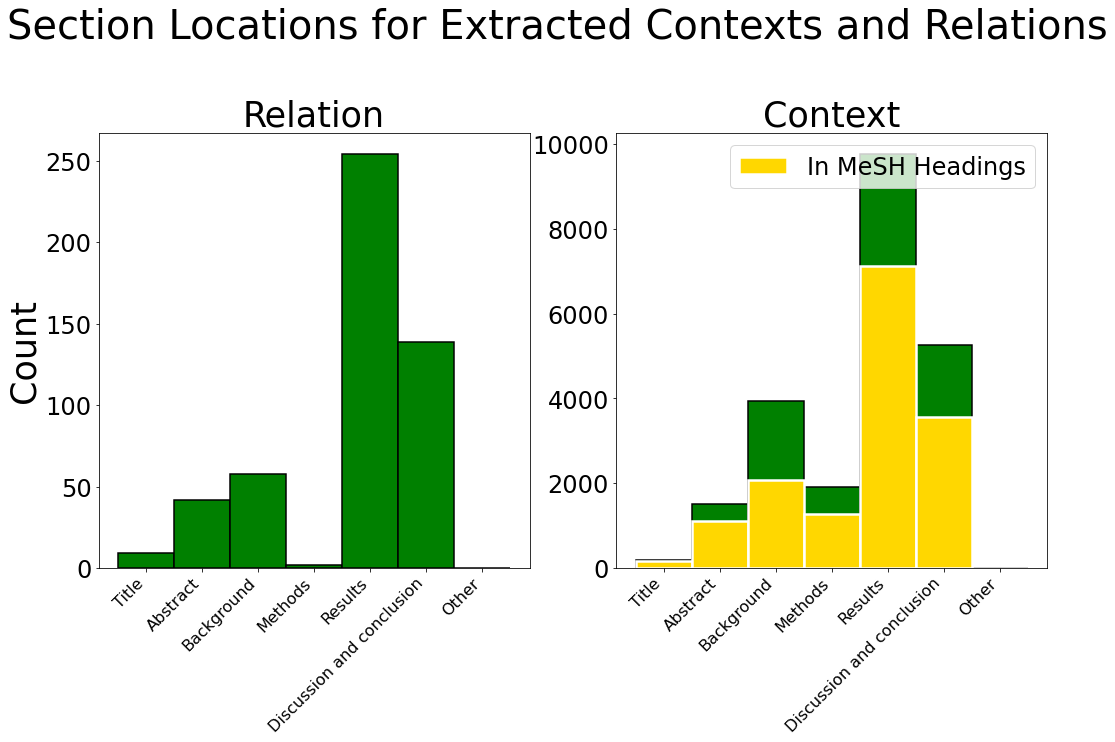

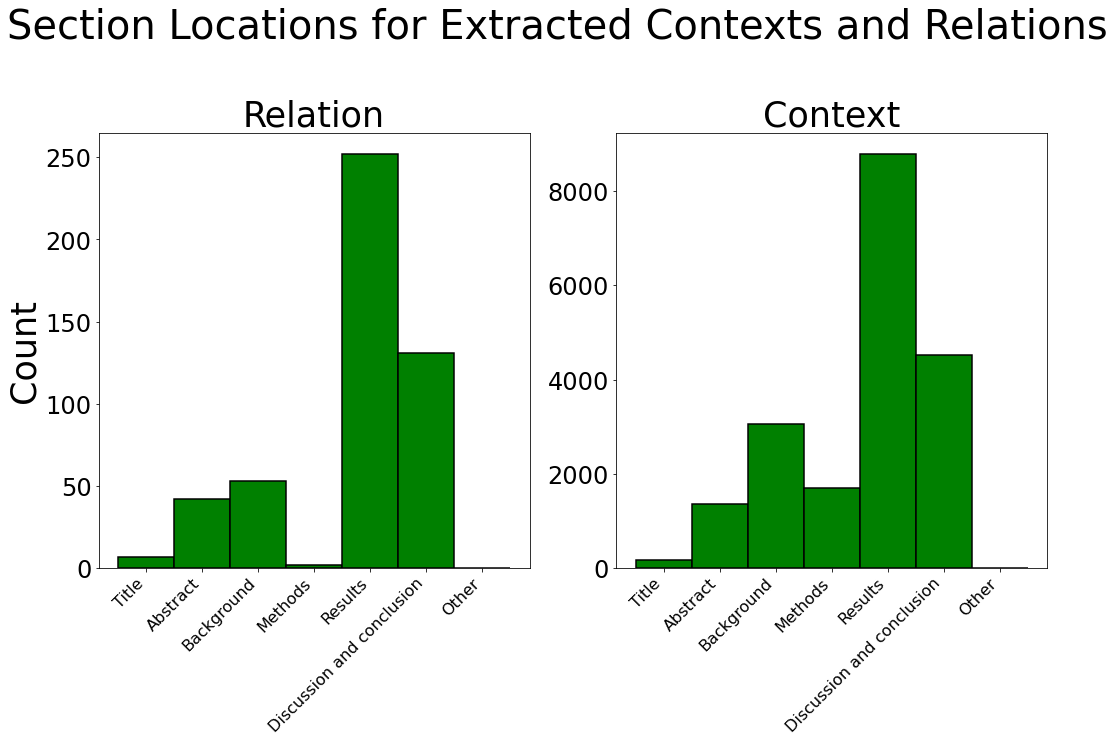

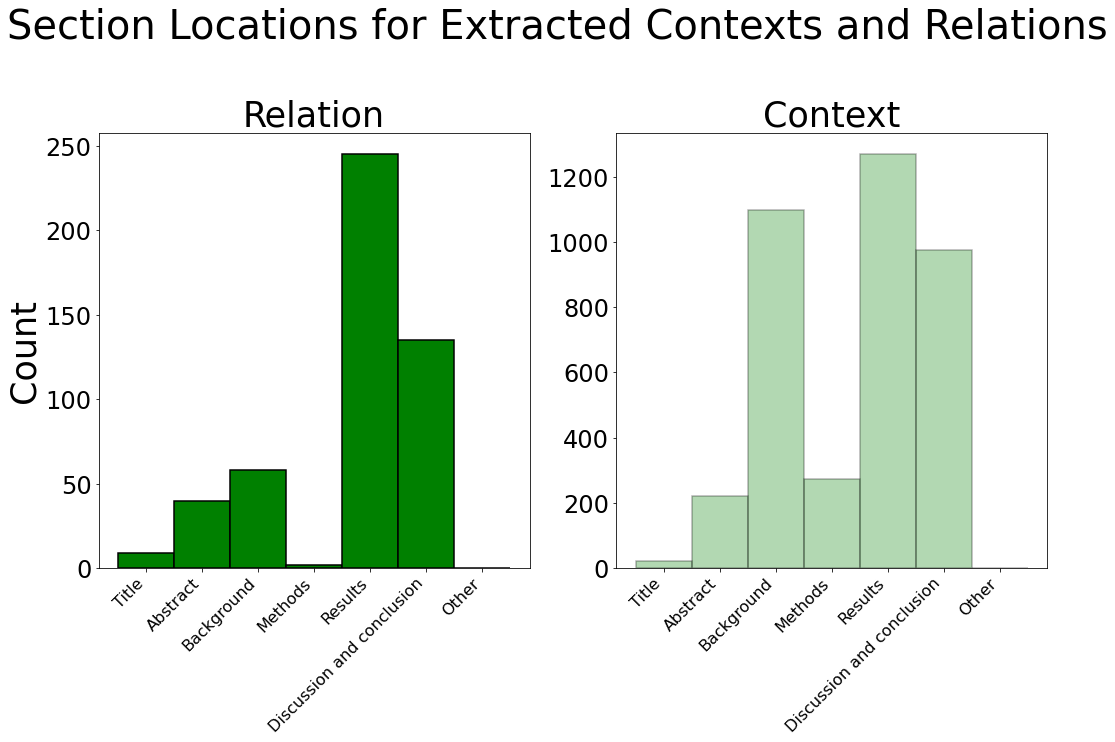

In [4]:
# Plot distributions. Note: plotting by individual mention in text, not by context generally (i.e. counts account for all mentions of 'hepatocyte' in a text)

draw_section_distribution(insider_df_CT_features_annots, in_mesh=True, out_dir=fig_out_dir, filename="InsiderCTAll")
draw_section_distribution(insider_df_CT_features_annots[insider_df_CT_features_annots.annotation], in_mesh=False, out_dir=fig_out_dir, filename="InsiderCTPos")
draw_section_distribution(insider_df_CT_features_annots[~insider_df_CT_features_annots.annotation], in_mesh=False, alpha=.3, out_dir=fig_out_dir, filename="InsiderCTNeg")

What is the relationship between "commonness" of the term and its appearance as a MeSH term. Namely, are really common terms (e.g. "macrophage") more likely to be annotated as a MeSH heading. Or maybe are really rare terms so significant as central topics that if they ever appear, they're a MeSH term in a paper? Let's explore what how correlated these variables are.

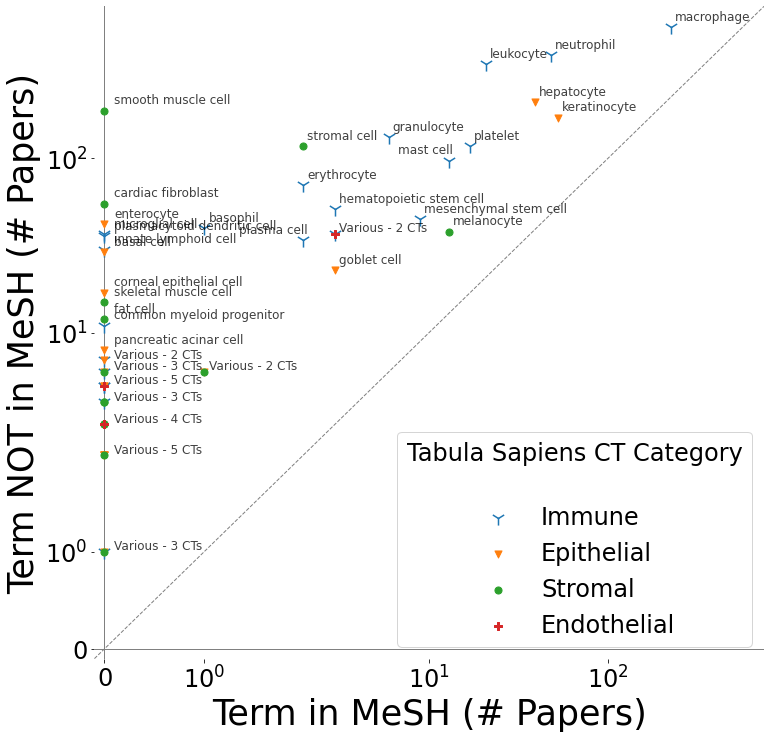

In [5]:
draw_CTs_in_mesh_counts(insider_df_CT_features, out_dir=fig_out_dir, filename="Insider")

Okay, now we're ready to train our classifiers--let's see some results!

N negatives: 1130
N positives: 491
Total len of resulting DF: 1621


N negatives - after up/down-weighting: 491
N positives - after up/down-weighting: 491
Total len of resulting DF: 982
Initializing list of untrained models...
Fitting model: Logistic Reg
Fitting model: SVC - Linear
Fitting model: Random Forest
Fitting model: Feedforward Neural Net


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model: Gradient Boosted Trees


Map:   0%|                                                                                       | 0/654 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Pre-saved model already found, loading from /Users/dnsosa/Desktop/AltmanLab/lit_contextizer/TFmodels/biobert/insiderCT_TRAINED


Map:   0%|                                                                                       | 0/654 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Pre-saved model already found, loading from /Users/dnsosa/Desktop/AltmanLab/lit_contextizer/TFmodels/pubmedbert/insiderCT_TRAINED


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Looking at clf: Logistic Reg
Accuracy 0.9390243902439024
PRINTING METRICS!
(0.9565217391304348, 0.9221556886227545, 0.9390243902439025, None)
Looking at clf: SVC - Linear
Accuracy 0.9298780487804879
PRINTING METRICS!
(0.9556962025316456, 0.9041916167664671, 0.9292307692307693, None)
Looking at clf: Random Forest
Accuracy 0.9542682926829268
PRINTING METRICS!
(0.9634146341463414, 0.9461077844311377, 0.9546827794561933, None)
Looking at clf: Feedforward Neural Net
Accuracy 0.948170731707317
PRINTING METRICS!
(0.9746835443037974, 0.9221556886227545, 0.9476923076923077, None)
Looking at clf: Gradient Boosted Trees
Accuracy 0.948170731707317
PRINTING METRICS!
(0.9629629629629629, 0.9341317365269461, 0.9483282674772036, None)


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Accuracy 0.573170731707317
PRINTING METRICS!
(0.6521739130434783, 0.2795031055900621, 0.3913043478260869, None)


Accuracy 0.5670731707317073
PRINTING METRICS!
(0.6792452830188679, 0.2236024844720497, 0.33644859813084116, None)


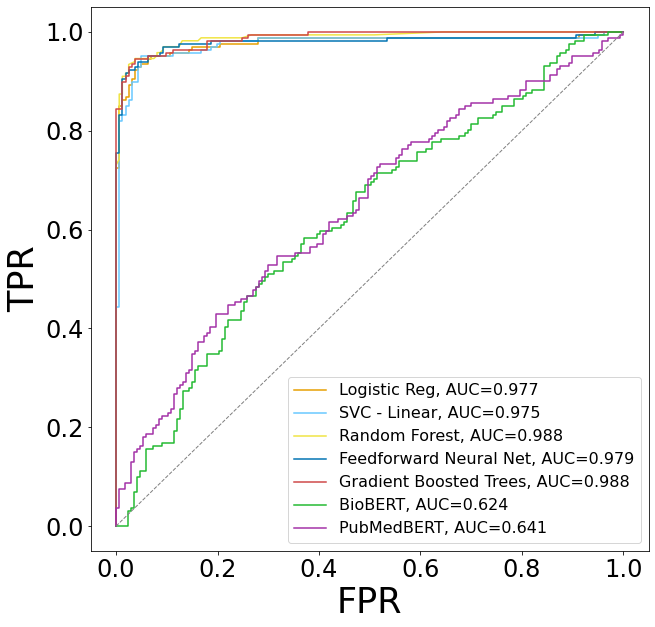

Here are the fs
[0.9390243902439025, 0.9292307692307693, 0.9546827794561933, 0.9476923076923077, 0.9483282674772036, 0.3913043478260869, 0.33644859813084116]
Here are the recs
[0.9221556886227545, 0.9041916167664671, 0.9461077844311377, 0.9221556886227545, 0.9341317365269461, 0.2795031055900621, 0.2236024844720497]
Enumerating fs


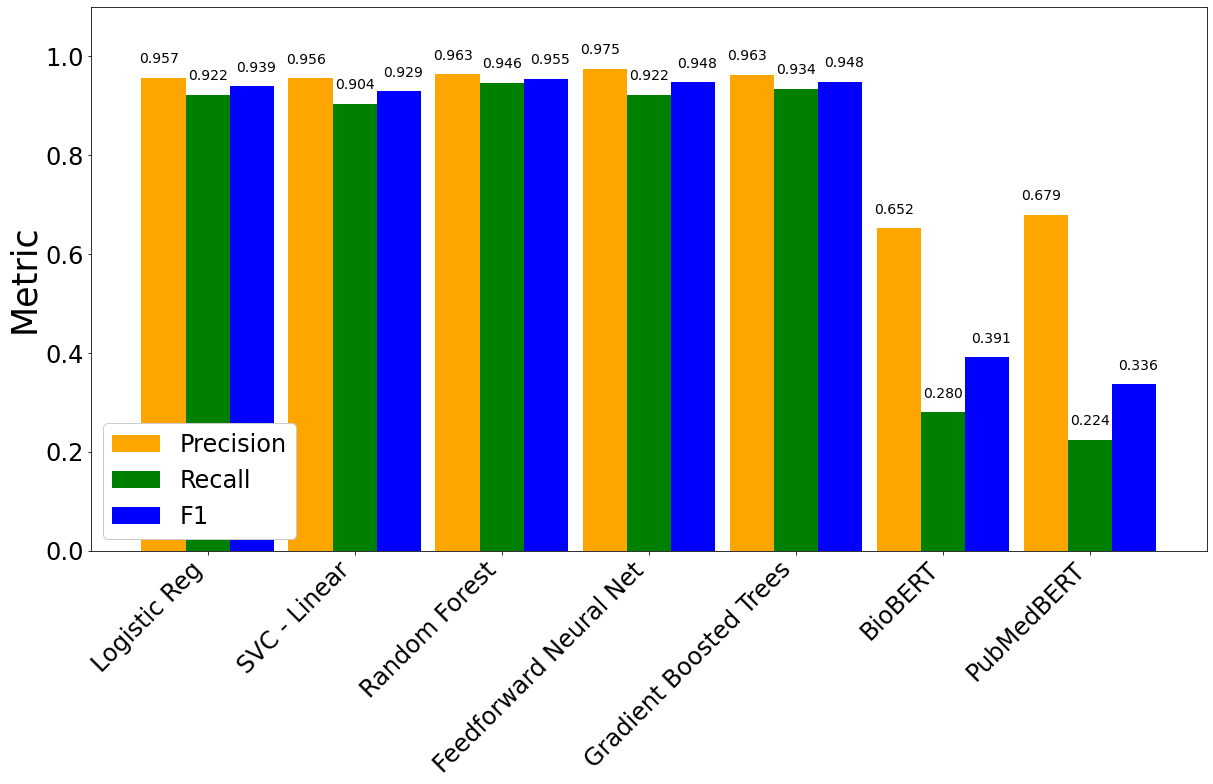

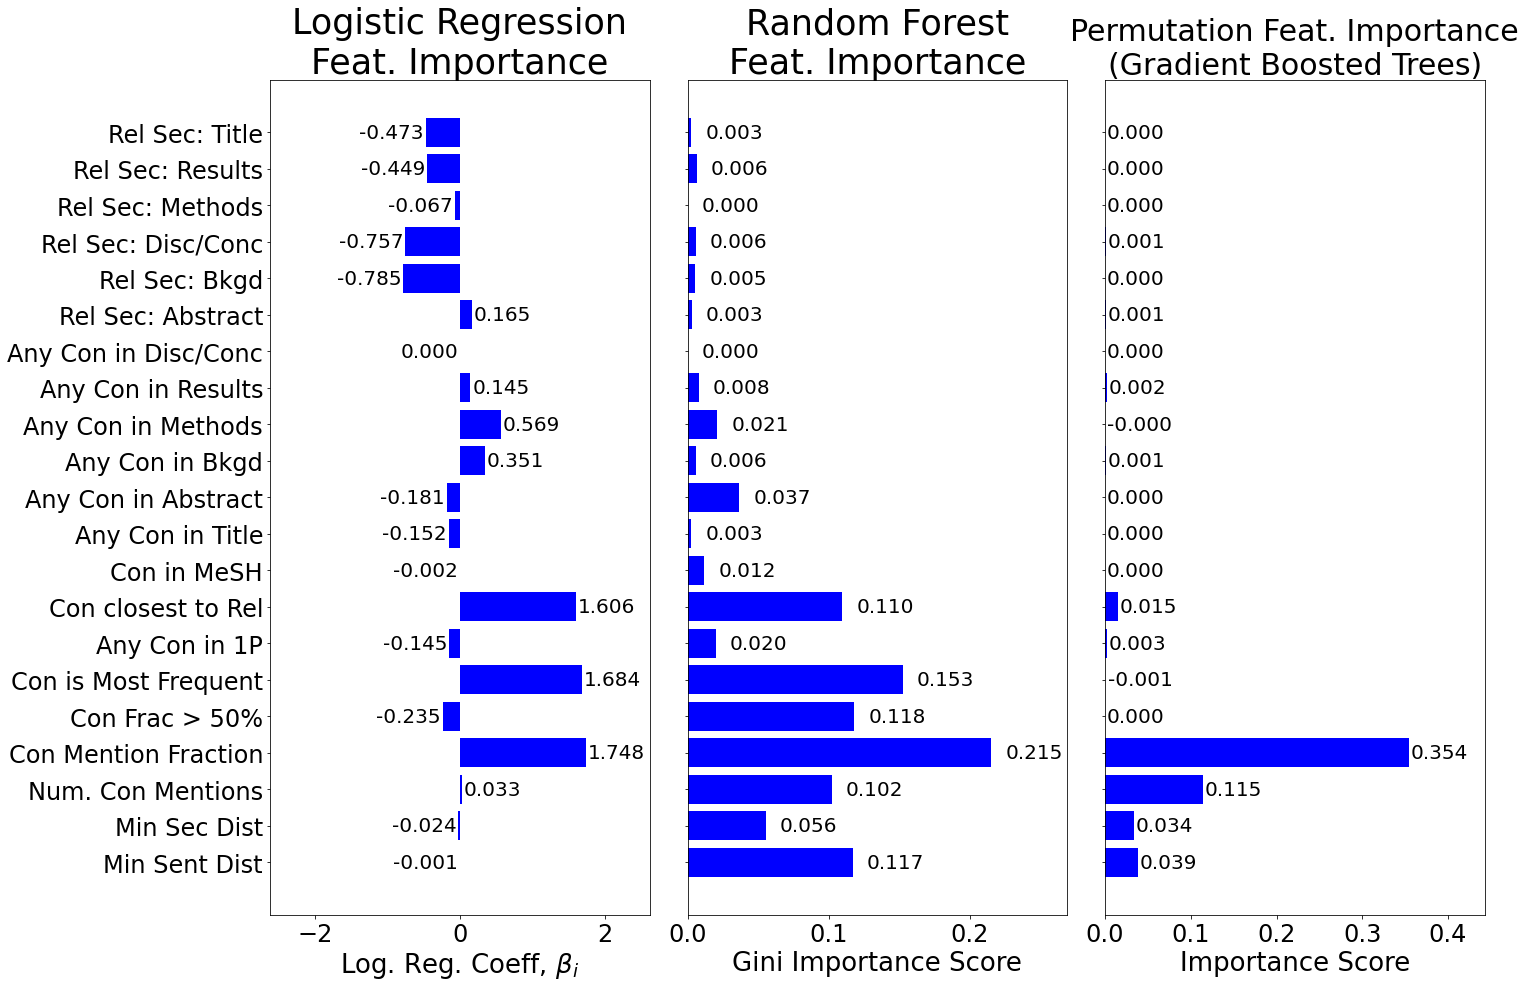

In [3]:
tf_model_root_dir = os.path.abspath(os.path.join(pwd, f'../TFmodels'))

insider_CT_res_df, insider_CT_clf_list, insider_CT_predictions_df = generate_analysis_figs(insider_df_CT_features_annots,
                                                                                           data_id="insiderCT",
                                                                                           tf_model_root_dir=tf_model_root_dir,
                                                                                           grouped_analysis=True,
                                                                                           downsample_maj=True,
                                                                                           upsample_min=False,
                                                                                           weight_imbalance=False,
                                                                                           plot_roc_curve=True,
                                                                                           plot_confusion_matrices=False,
                                                                                           plot_feature_analysis=True,
                                                                                           out_dir=fig_out_dir,
                                                                                           in_loc='lower left',
                                                                                           filename="insiderCT")


How far are our positive contexts away from the relation (excluding the context mention inside the insider of course)?

Number positive CTs with min sentence distance <= 5: 399 (81.3%)
Number positive CTs with min sentence distance >= 10: 60 (12.2%)


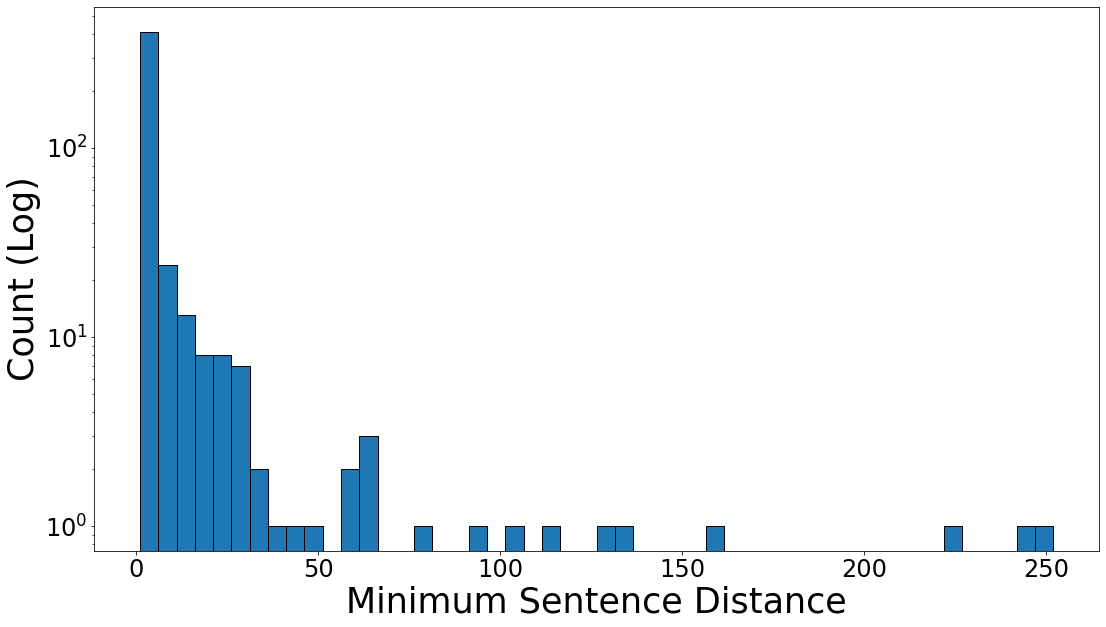

In [6]:
# Count the sentence distances within certain bounds
low_bound = 5
up_bound = 10
n_pos = len(insider_CT_res_df[insider_CT_res_df.annotation])
pos_within_lb = len(insider_CT_res_df[(insider_CT_res_df.annotation) & (insider_CT_res_df.min_sent_dist <= low_bound)])
pos_gt_ub = len(insider_CT_res_df[(insider_CT_res_df.annotation) & (insider_CT_res_df.min_sent_dist >= up_bound)])

print(f"Number positive CTs with min sentence distance <= {low_bound}: {pos_within_lb} ({round(pos_within_lb / n_pos, 3)*100}%)")
print(f"Number positive CTs with min sentence distance >= {up_bound}: {pos_gt_ub} ({round(pos_gt_ub / n_pos, 3)*100}%)")

# Plot the distribution of sentence distances
fig = plt.figure(figsize=(18, 10))

positives_sent_dists = np.array(insider_CT_res_df[insider_CT_res_df.annotation].min_sent_dist)
plt.hist(positives_sent_dists, edgecolor="black", bins=50)
plt.yscale('log')
plt.ylabel('Count (Log)')
plt.xlabel('Minimum Sentence Distance')

# Save file
out_file = os.path.join(fig_out_dir, f"MinSentDist_PositiveInsiderCT.png")
plt.savefig(out_file, dpi=300, bbox_inches="tight")
plt.show()

And we can check out some examples where the context is far away

In [9]:
insider_CT_res_df[insider_CT_res_df.annotation & (insider_CT_res_df.min_sent_dist >= 10)].head(3)

,rel,con,min_sent_dist,min_sec_dist,num_con_mentions,con_mention_frac,con_mention_50,is_con_mention_max,any_con_fp,is_closest_cont_by_sent,con_in_mesh_headings,norm_rel_sec,any_con_title,any_con_abstract,any_con_background,any_con_methods,any_con_results,any_con_disc_conc,annotation
569,"Notably, we find that Wnt4 suppresses Tak1 activation induced by Rankl, resulting in the inhibition of IKK/NF-κB activation in [MASK]s",macrophage,29.0,6.0,20,0.952381,True,True,True,True,0,discussion and conclusion,False,True,False,False,True,False,True
769,"Furthermore, DKK1 induces the expression of keratin 9 and α-Kelch-like ECT2 interacting protein (αKLEIP) but down-regulates the expression of β-catenin, glycogen synthase kinase 3β, protein kinase C and proteinase-activated receptor-2 (PAR-2) in [MASK]s",keratinocyte,19.0,6.0,18,0.580645,True,True,True,False,1,abstract,False,False,True,False,False,False,True
801,"Using Western blotting, we confirmed an upregulation of MT1-MMP by C5a in [MASK]s and MNC.",leukocyte,12.0,3.0,11,0.323529,False,False,True,False,0,results,False,False,False,True,True,False,True


It's interesting to see what went wrong. Here are some false positives and false negatives.

In [12]:
# Error analysis

error_df_fns = insider_CT_predictions_df[(insider_CT_predictions_df.Label != insider_CT_predictions_df["Pred: Random Forest"]) & insider_CT_predictions_df.Label]
error_df_fps = insider_CT_predictions_df[(insider_CT_predictions_df.Label != insider_CT_predictions_df["Pred: Random Forest"]) & ~insider_CT_predictions_df.Label]

# The following were found from a head of both of the above dataframes
#insider_df_CTs[insider_df_CTs.PMCID == 'PMC2884222']
#insider_df_CTs[insider_df_CTs.PMCID == 'PMC3849919']
#insider_df_CTs[insider_df_CTs.PMCID == 'PMC6103837']

#insider_df_CTs[insider_df_CTs.PMCID == 'PMC3561241']
#insider_df_CTs[insider_df_CTs.PMCID == 'PMC4644191']
#insider_df_CTs[insider_df_CTs.PMCID == 'PMC6864939']

It's also interesting to see how well our trained models do against simple benchmarks. Let's compare our best trained model to the benchmarks.

Looking at benchmark: any_rel_con_section_match
Accuracy 0.6629327902240326
Looking at benchmark: is_con_mention_max
Accuracy 0.9276985743380856
Looking at benchmark: con_mention_50
Accuracy 0.9154786150712831
Looking at benchmark: con_in_mesh_headings
Accuracy 0.7525458248472505
Looking at benchmark: min_sent_dist_1
Accuracy 0.7342158859470469
Looking at benchmark: min_sent_dist_2
Accuracy 0.8228105906313645
Looking at benchmark: min_sent_dist_3
Accuracy 0.8421588594704684
Looking at benchmark: min_sent_dist_4
Accuracy 0.8492871690427699
Looking at benchmark: min_sent_dist_5
Accuracy 0.8564154786150713
Looking at benchmark: min_sent_dist_6
Accuracy 0.8615071283095723


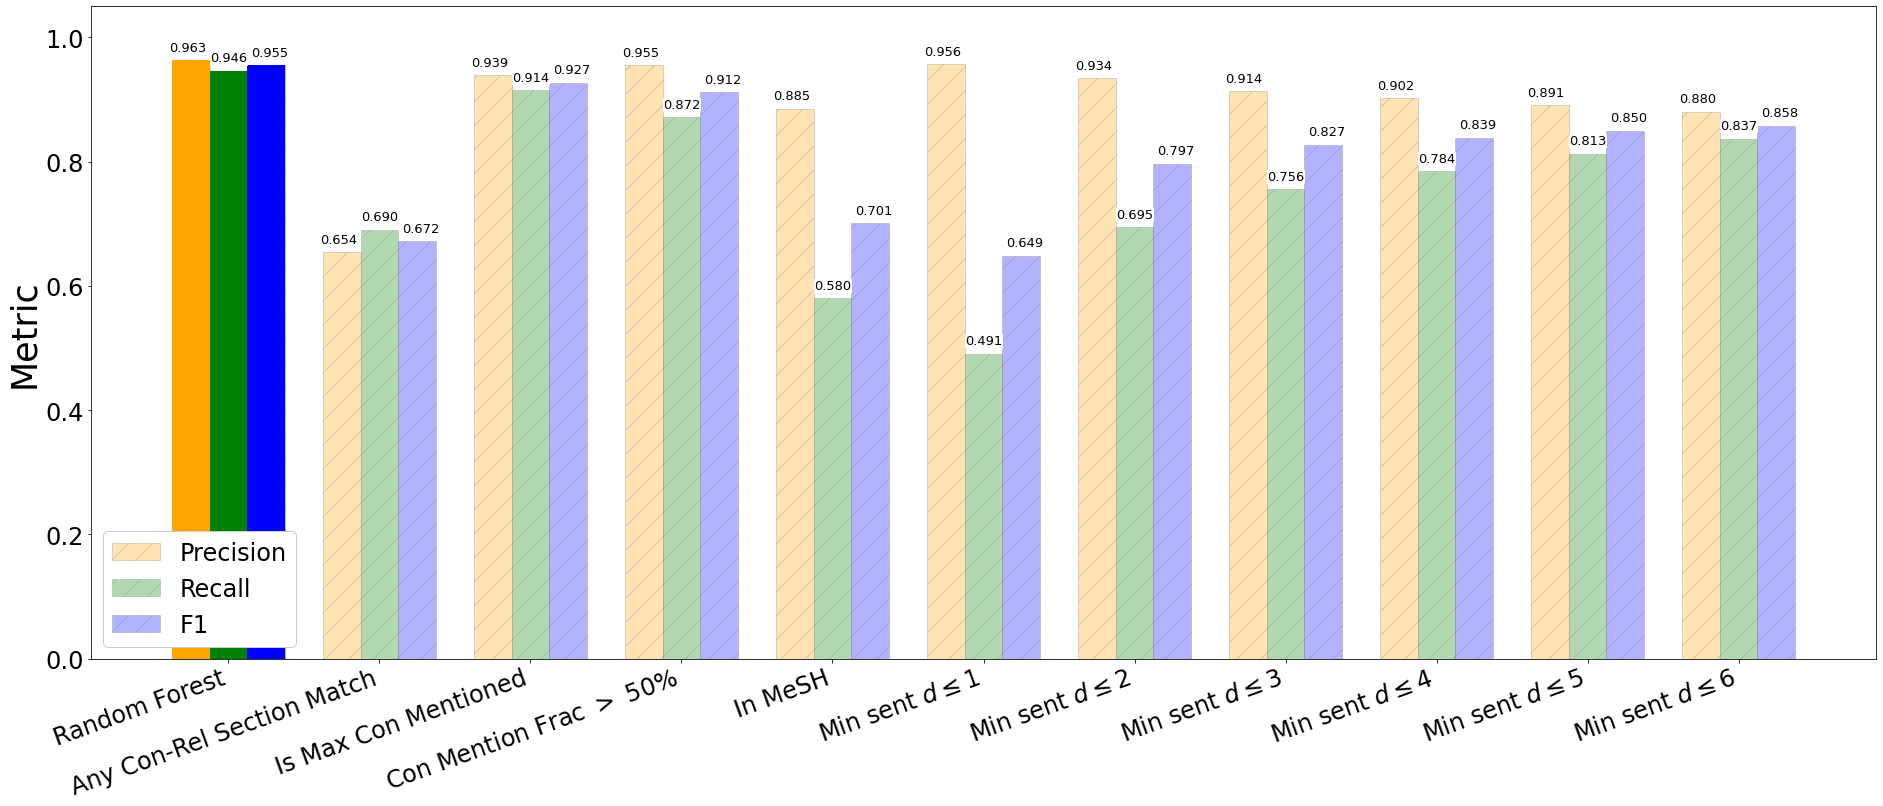

In [4]:
plot_benchmark_fig(insider_CT_res_df, 
                   best_model_name="Random Forest", 
                   best_model_stats=[0.963, 0.946, 0.955],
                   out_dir=fig_out_dir,
                   filename="insiderCT")

#### Transfer to Insider Tissue Analysis

Now, we'll take our pipeline for cell types and see how well it does on a different context--tissues

Number of unique papers with inside sentences --  endometrium: 3
Number of unique papers with inside sentences --  coronary artery: 3
Number of unique papers with inside sentences --  eye: 5
Number of unique papers with inside sentences --  aorta: 14
Number of unique papers with inside sentences --  conjunctiva: 3
Number of unique papers with inside sentences --  adipose tissue: 73
Number of unique papers with inside sentences --  lymph node: 7
Number of unique papers with inside sentences --  blood: 33
Number of unique papers with inside sentences --  sclera: 1
Number of unique papers with inside sentences --  vasculature: 1
Number of unique papers with inside sentences --  cornea: 18
Number of unique papers with inside sentences --  parotid gland: 1
Number of unique papers with inside sentences --  lung: 386
PMID: 21738791 not found in dict!
Number of unique papers with inside sentences --  bone marrow: 63
Number of unique papers with inside sentences --  kidney: 44
Number of unique 

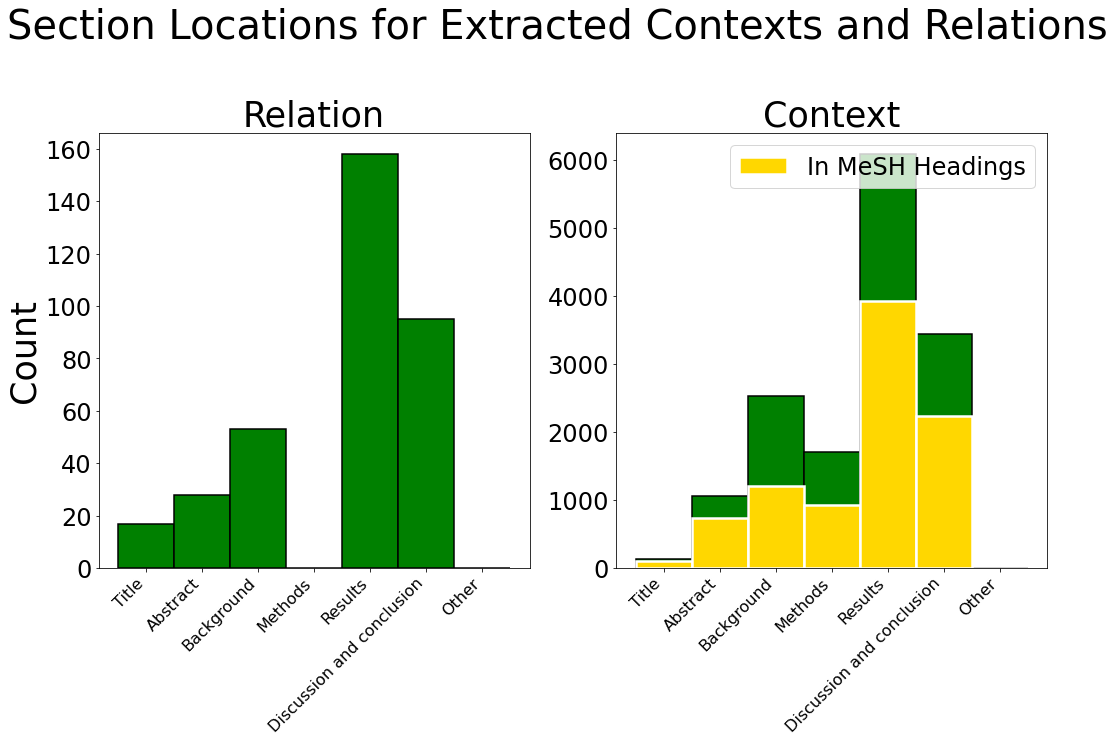

In [6]:
# Load the previously extracted features
insider_df_tissue_features_path = os.path.join(out_dir, "tissues_insider_papers_features_df.tsv")
insider_df_tissue_features = pd.read_csv(insider_df_tissue_features_path, sep='\t')

# Generate the Insider corpus
insider_df_tissues = dl.create_insider_corpus(context_type="tissues")

# Combine the two to label the featurized papers based on Insider sentences
insider_df_tissue_features_annots = include_annotations_in_insider_corpus(insider_df_tissues, insider_df_tissue_features)

# Visualize the section distributions
draw_section_distribution(insider_df_tissue_features_annots, 
                          out_dir=fig_out_dir, 
                          filename="insiderTissues")


Run the same classification pipeline as before, now for tissues

N negatives: 822
N positives: 344
Total len of resulting DF: 1166


N negatives - after up/down-weighting: 822
N positives - after up/down-weighting: 344
Total len of resulting DF: 1166
norm_rel_sec_methods not found in column list. Assigning it a column of falses
List of 5 pre-trained models provided. No need to initialize new models.


Map:   0%|                                                                                      | 0/1166 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Pre-saved model already found, loading from /Users/dnsosa/Desktop/AltmanLab/lit_contextizer/TFmodels/biobert/insiderCT_TRAINED


Map:   0%|                                                                                      | 0/1166 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Pre-saved model already found, loading from /Users/dnsosa/Desktop/AltmanLab/lit_contextizer/TFmodels/pubmedbert/insiderCT_TRAINED


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted wi

Looking at clf: Logistic Reg
Accuracy 0.8996569468267581
PRINTING METRICS!
(0.7979002624671916, 0.8837209302325582, 0.8386206896551724, None)
Looking at clf: SVC - Linear
Accuracy 0.9150943396226415
PRINTING METRICS!
(0.8393351800554016, 0.8808139534883721, 0.8595744680851064, None)
Looking at clf: Random Forest
Accuracy 0.9125214408233276
PRINTING METRICS!
(0.8342541436464088, 0.877906976744186, 0.8555240793201133, None)
Looking at clf: Feedforward Neural Net
Accuracy 0.8996569468267581
PRINTING METRICS!
(0.8026666666666666, 0.875, 0.8372739916550764, None)
Looking at clf: Gradient Boosted Trees
Accuracy 0.9099485420240138
PRINTING METRICS!
(0.8328690807799443, 0.8691860465116279, 0.8506401137980085, None)


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Accuracy 0.6938250428816467
PRINTING METRICS!
(0.21739130434782608, 0.014534883720930232, 0.027247956403269755, None)


Accuracy 0.6578044596912521
PRINTING METRICS!
(0.2727272727272727, 0.09593023255813954, 0.14193548387096774, None)


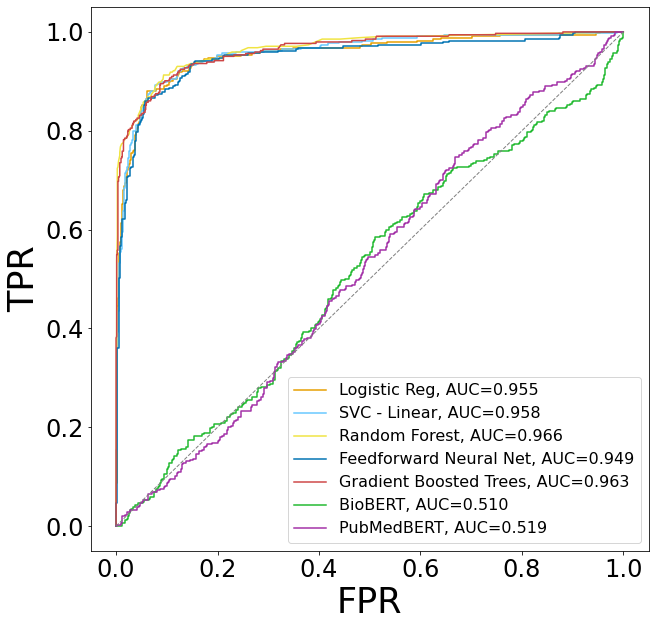

Here are the fs
[0.8386206896551724, 0.8595744680851064, 0.8555240793201133, 0.8372739916550764, 0.8506401137980085, 0.027247956403269755, 0.14193548387096774]
Here are the recs
[0.8837209302325582, 0.8808139534883721, 0.877906976744186, 0.875, 0.8691860465116279, 0.014534883720930232, 0.09593023255813954]
Enumerating fs


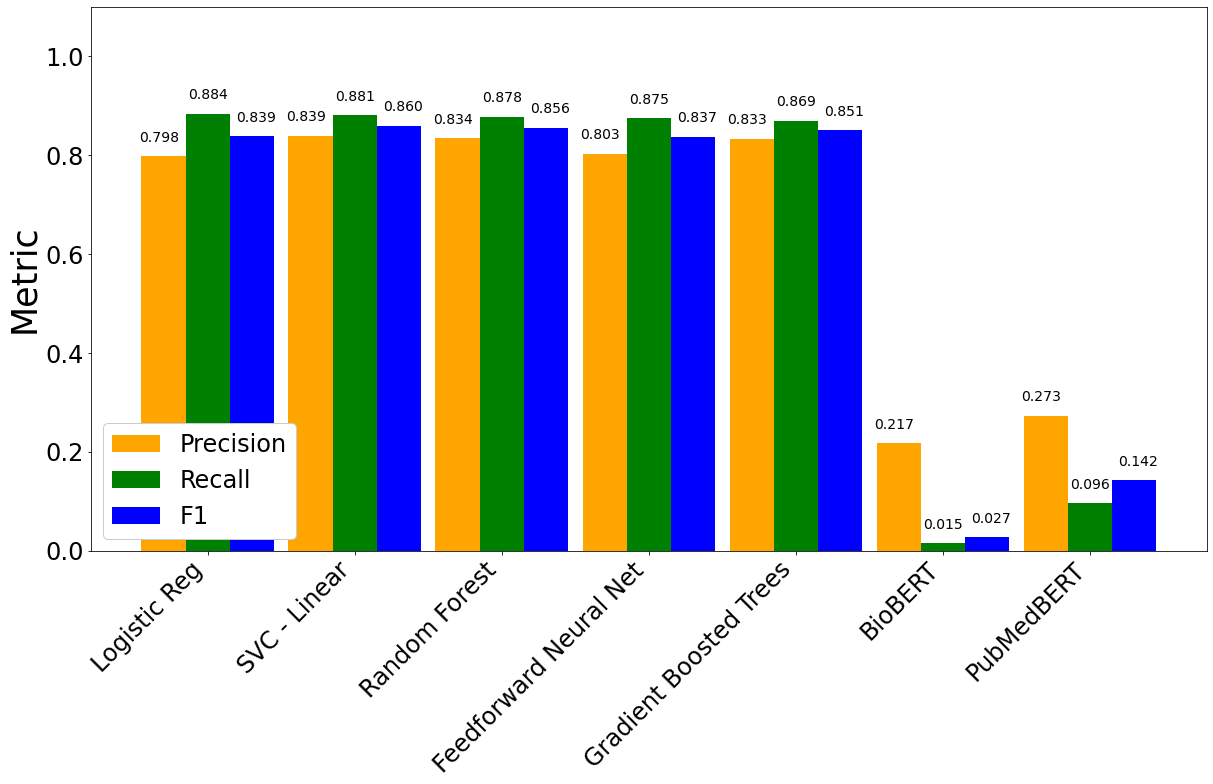

In [7]:
insider_tissue_res_df, _, insider_tissue_predictions_df = generate_analysis_figs(insider_df_tissue_features_annots, 
                                                                                 data_id="insiderCT",
                                                                                 tf_model_root_dir=tf_model_root_dir,
                                                                                 grouped_analysis=True,
                                                                                 downsample_maj=False,
                                                                                 upsample_min=False,
                                                                                 weight_imbalance=False,
                                                                                 in_clf_list=insider_CT_clf_list,
                                                                                 plot_roc_curve=True,
                                                                                 plot_confusion_matrices=False,
                                                                                 plot_feature_analysis=False,
                                                                                 out_dir=fig_out_dir,
                                                                                 in_loc='lower left',
                                                                                 filename="insiderTissues")



... and look at performance compared to benchmarks

Looking at benchmark: any_rel_con_section_match
Accuracy 0.6286449399656947
Looking at benchmark: is_con_mention_max
Accuracy 0.9150943396226415
Looking at benchmark: con_mention_50
Accuracy 0.9202401372212693
Looking at benchmark: con_in_mesh_headings
Accuracy 0.8147512864493996
Looking at benchmark: min_sent_dist_1
Accuracy 0.7898799313893653
Looking at benchmark: min_sent_dist_2
Accuracy 0.8198970840480274
Looking at benchmark: min_sent_dist_3
Accuracy 0.8319039451114922
Looking at benchmark: min_sent_dist_4
Accuracy 0.8276157804459692
Looking at benchmark: min_sent_dist_5
Accuracy 0.8190394511149228
Looking at benchmark: min_sent_dist_6
Accuracy 0.8087478559176673


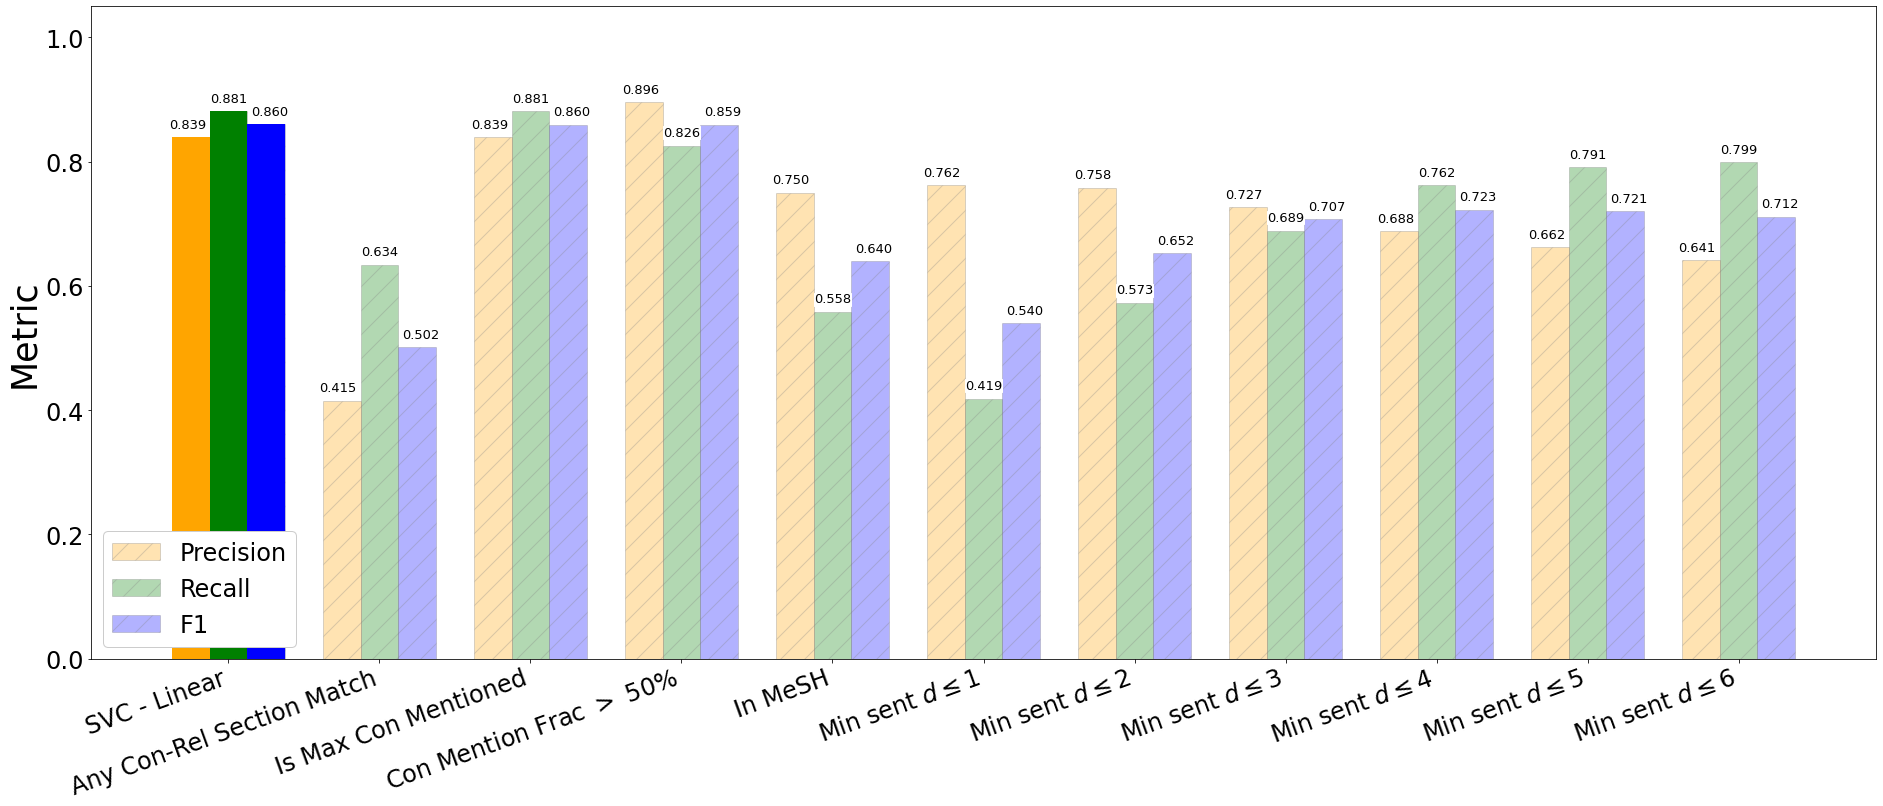

In [8]:
# Check that all the columns are fleshed out since the classifiers will expect the full number of columns

plot_benchmark_fig(insider_tissue_res_df, 
                   best_model_name="SVC - Linear",
                   best_model_stats=[0.839, 0.881, 0.860],
                   out_dir=fig_out_dir,
                   filename="insiderTissues")

#### Now demonstrating improvement over combining the two groups

In this section we look at how performance changes when I mix the two lexicons together as opposed to separating them into single context types.

N negatives: 1130
N positives: 491
Total len of resulting DF: 1621


N negatives - after up/down-weighting: 1130
N positives - after up/down-weighting: 491
Total len of resulting DF: 1621
Initializing list of untrained models...
Fitting model: Logistic Reg
Fitting model: SVC - Linear
Fitting model: Random Forest
Fitting model: Feedforward Neural Net


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model: Gradient Boosted Trees


Map:   0%|                                                                                     | 0/1080 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.2 were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if

No saved model found, loading from dmis-lab/biobert-base-cased-v1.2...


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Now training the model and saving at /Users/dnsosa/Desktop/AltmanLab/lit_contextizer/TFmodels/biobert/insiderCT_noDownsample_TRAINED
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


wandb: Currently logged in as: dnsosa. Use `wandb login --relogin` to force relogin


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.618000,0.622713,0.689464


Map:   0%|                                                                                     | 0/1080 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining mode

No saved model found, loading from microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext...


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Now training the model and saving at /Users/dnsosa/Desktop/AltmanLab/lit_contextizer/TFmodels/pubmedbert/insiderCT_noDownsample_TRAINED


Epoch,Training Loss,Validation Loss,Accuracy
1,0.616600,0.608341,0.689464


Looking at clf: Logistic Reg
Accuracy 0.933456561922366
PRINTING METRICS!
(0.9166666666666666, 0.8614457831325302, 0.8881987577639753, None)
Looking at clf: SVC - Linear
Accuracy 0.9316081330868762
PRINTING METRICS!
(0.9161290322580645, 0.8554216867469879, 0.8847352024922119, None)
Looking at clf: Random Forest
Accuracy 0.9371534195933456
PRINTING METRICS!
(0.9125, 0.8795180722891566, 0.8957055214723926, None)
Looking at clf: Feedforward Neural Net
Accuracy 0.922365988909427
PRINTING METRICS!
(0.8875, 0.8554216867469879, 0.8711656441717791, None)
Looking at clf: Gradient Boosted Trees
Accuracy 0.9297597042513863
PRINTING METRICS!
(0.9155844155844156, 0.8493975903614458, 0.88125, None)


Accuracy 0.6894639556377079
PRINTING METRICS!
(0.0, 0.0, 0.0, None)


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.6894639556377079
PRINTING METRICS!
(0.0, 0.0, 0.0, None)


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


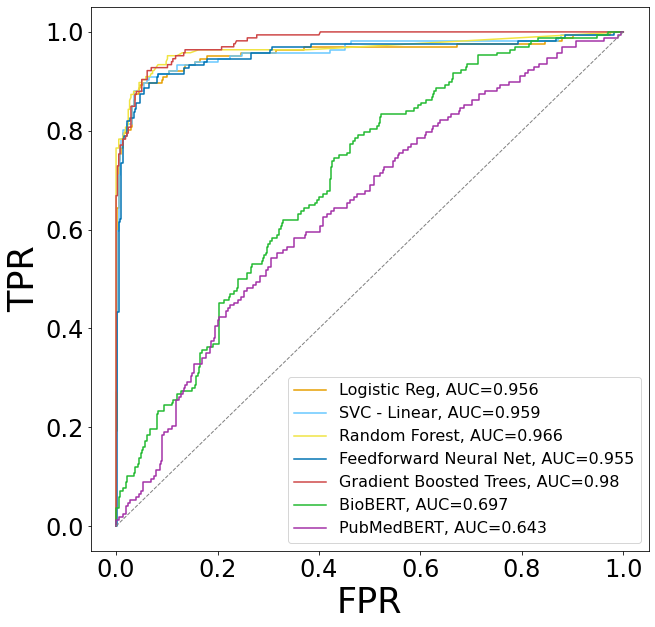

Here are the fs
[0.8881987577639753, 0.8847352024922119, 0.8957055214723926, 0.8711656441717791, 0.88125, 0.0, 0.0]
Here are the recs
[0.8614457831325302, 0.8554216867469879, 0.8795180722891566, 0.8554216867469879, 0.8493975903614458, 0.0, 0.0]
Enumerating fs


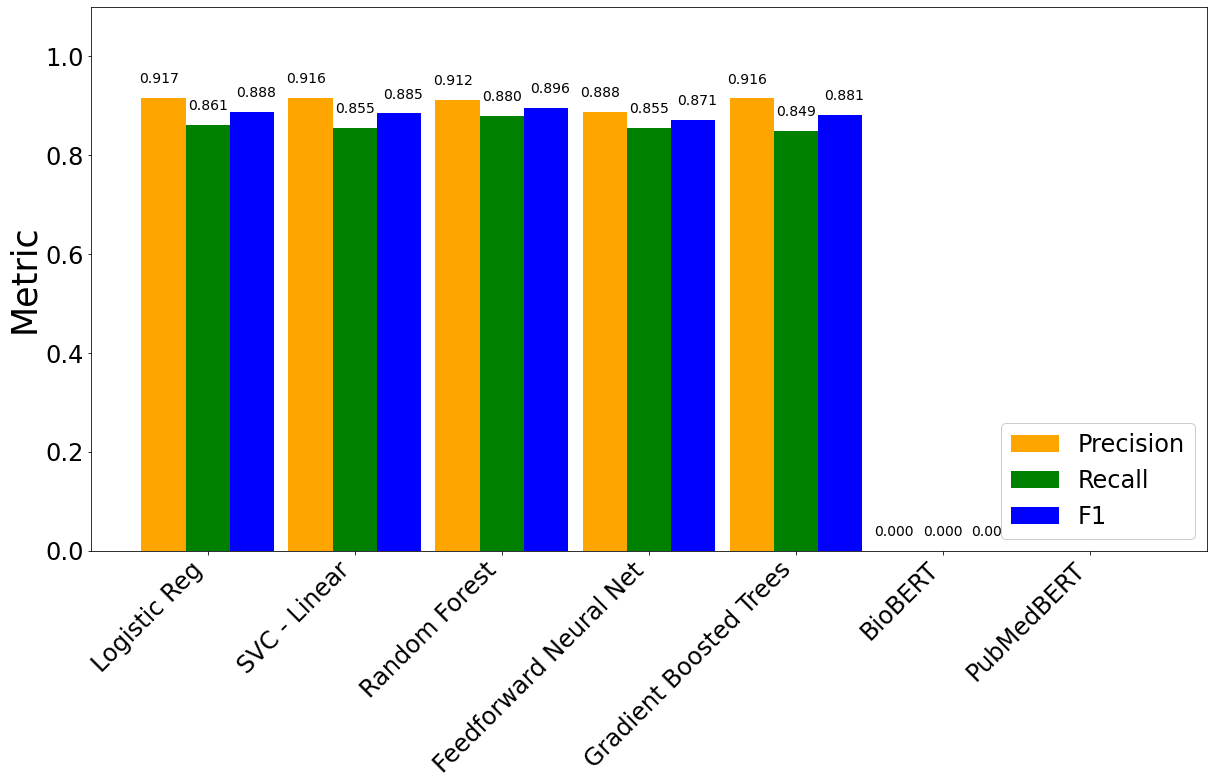

In [9]:
# First, let's recalculate the CT analyses with no downsampling

insider_CT_res_noDown_df, _, _ = generate_analysis_figs(insider_df_CT_features_annots, 
                                                        data_id="insiderCT_noDownsample",
                                                        tf_model_root_dir=tf_model_root_dir,
                                                        grouped_analysis=True,
                                                        downsample_maj=False,
                                                        upsample_min=False,
                                                        weight_imbalance=False,
                                                        plot_roc_curve=True,
                                                        plot_confusion_matrices=False,
                                                        plot_feature_analysis=False,
                                                        out_dir=fig_out_dir,
                                                        filename="insiderCT_noDownsample")

In [10]:
# Let's now calculate the classification results with CT + Tissue types mixed together

insider_df_combined_features_path = os.path.join(out_dir, "combined_insider_papers_features_df.tsv")
insider_df_combined_features = pd.read_csv(insider_df_combined_features_path, sep='\t')

insider_df_combined_positives = pd.concat([insider_df_CTs, insider_df_tissues])

insider_df_combined_features_annots = include_annotations_in_insider_corpus(insider_df_combined_positives, insider_df_combined_features)


insider_combined_res_df, insider_combined_clf_list, insider_combined_predictions_df = generate_analysis_figs(insider_df_combined_features_annots, 
                                                                                                             data_id="insiderCombined",
                                                                                                             tf_model_root_dir=tf_model_root_dir,
                                                                                                             grouped_analysis=True,
                                                                                                             downsample_maj=False,
                                                                                                             upsample_min=False,
                                                                                                             weight_imbalance=False,
                                                                                                             plot_roc_curve=True,
                                                                                                             plot_confusion_matrices=False,
                                                                                                             plot_feature_analysis=True,
                                                                                                             out_dir=fig_out_dir,
                                                                                                             filename="insiderCombined")

N negatives: 3944
N positives: 835
Total len of resulting DF: 4779


N negatives - after up/down-weighting: 3944
N positives - after up/down-weighting: 835
Total len of resulting DF: 4779
Initializing list of untrained models...
Fitting model: Logistic Reg
Fitting model: SVC - Linear
Fitting model: Random Forest
Fitting model: Feedforward Neural Net
Fitting model: Gradient Boosted Trees


Map:   0%|                                                                                     | 0/3186 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.2 were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if

No saved model found, loading from dmis-lab/biobert-base-cased-v1.2...


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Now training the model and saving at /Users/dnsosa/Desktop/AltmanLab/lit_contextizer/TFmodels/biobert/insiderCombined_TRAINED


Epoch,Training Loss,Validation Loss



KeyboardInterrupt



Threshold for 90% recall: 0.447
Precision for 90% recall: 0.898
Threshold for 90% recall: 0.333
Precision for 90% recall: 0.801


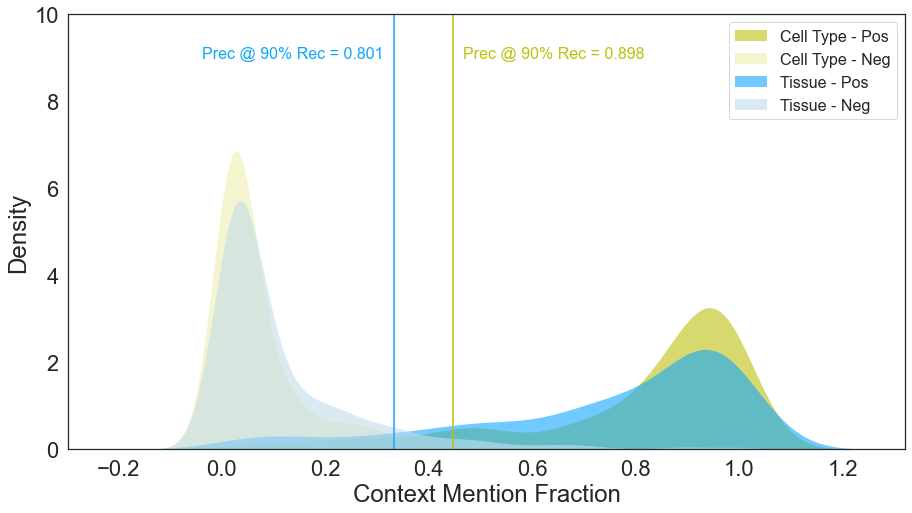

Threshold for 90% recall: 0.193
Precision for 90% recall: 0.619


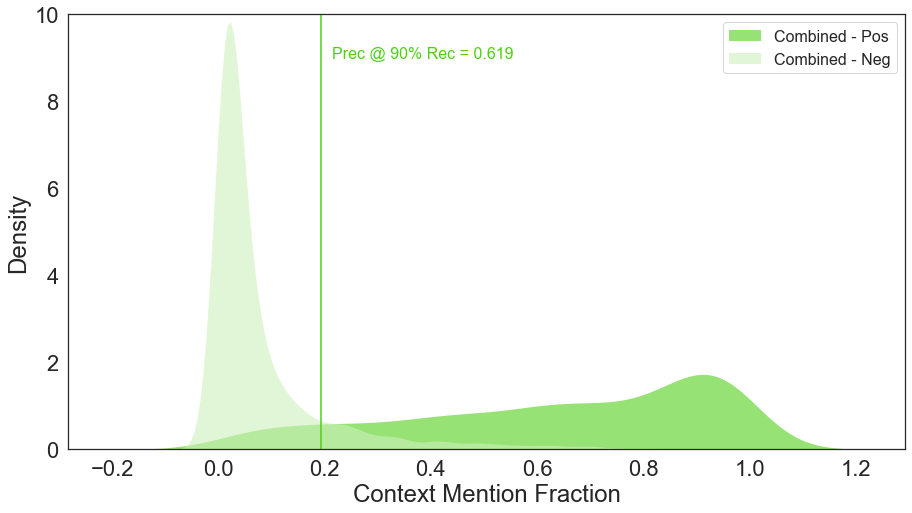

In [22]:
# Finally, let's check out how precision changes using the important context mention fraction feature on the single context type lexicon versus the combined.

plot_con_mention_frac_precision_plots(insider_CT_res_noDown_df, 
                                      insider_tissue_res_df, 
                                      insider_combined_res_df, 
                                      fig_out_dir)


### GIANT Distant Supervision Tissue-PPI Associations

Now let's take a look at using orthogonal context-enriched data under our framework and see how we can find those associations. We'll look at the GIANT (https://giant.princeton.edu/) tissue-specific PPI networks. Given a tissue, $T$, and a PPI in that GIANT PPI network, $r$, we're going to be making the huge assumption that if we see $T$ and $r$ mentioned in the text together, $T$ is an appropriate association for $r$. Qualitative analysis reveals that this assumption is quite strong.

We'll be looking at 3 PPI networks: adipose, liver, and lung. Let's load up all the papers we find containing a
ppi relation, $r$, and one of these three tissues, $T$.

In [9]:
adipose_res_path = os.path.join(out_dir, "adipose_tissue_ppi_pmc_df.csv")
liver_res_path = os.path.join(out_dir, "liver_ppi_pmc_df.csv")
lung_res_path = os.path.join(out_dir, "lung_ppi_pmc_df.csv")

adipose_res = pd.read_csv(adipose_res_path)
liver_res = pd.read_csv(liver_res_path)
lung_res = pd.read_csv(lung_res_path)


adipose_res["context_term"] = "adipose tissue"
adipose_res["context_term_prefix"] = "adipo"

liver_res["context_term"] = "liver"
liver_res["context_term_prefix"] = "liver"

lung_res["context_term"] = "lung"
lung_res["context_term_prefix"] = "lung"

all_res_combined = pd.concat([adipose_res, liver_res, lung_res], ignore_index=True)

Set the confidence cutoff to .5, so we remove some of the noise

In [10]:
print("Adipose:")
adipose_res50 = adipose_res[adipose_res.Conf >= 0.5]
print(len(adipose_res50))

print("\nLiver:")
liver_res50 = liver_res[liver_res.Conf >= 0.5]
print(len(liver_res50))

print("\nLung:")
lung_res50 = lung_res[lung_res.Conf >= 0.5]
print(len(lung_res50))

giant_positives_df = all_res_combined[['rel', 'context_term']]
giant_positives_df.columns = ["Extracted Relation", "Context"]

all_res_combined50 = pd.concat([adipose_res50, liver_res50, lung_res50], ignore_index=True)

ppi_ds_features_df = pd.read_csv(os.path.join(out_dir,  "ppi_pmc_tissues_features_df.csv"))

ppi_ds_features_df50 = ppi_ds_features_df.merge(all_res_combined50, on='rel', how='inner')

Adipose:
258

Liver:
225

Lung:
397


In [11]:
# Now take out any non-citing sentences
non_citing_relations = dl.all_pubmed_relations_df[dl.all_pubmed_relations_df.distance_to_nearest_sentence_with_citation > 0].rel.drop_duplicates()
print(f"Number of unique non-citing relations: {len(non_citing_relations)}")

# Calculate some stats on the number of unique triples
giant_triples = all_res_combined50[['rel', 'pmid', 'context_term']].drop_duplicates()
n_giant_triples_nonciting = len(giant_triples[giant_triples['rel'].isin(non_citing_relations)])
print(len(all_res_combined50))

# Get the final feature and relation collections that will be input for our models
giant_positives_df50 = all_res_combined50[['rel', 'context_term']]
giant_positives_df50.columns = ["Extracted Relation", "Context"]
giant_df_features_annots50 = include_annotations_in_insider_corpus(giant_positives_df50, ppi_ds_features_df50)

print("After 50 filtration")
print(len(giant_df_features_annots50))
giant_df_features_annots50NC = giant_df_features_annots50.merge(non_citing_relations, on="rel", how="inner")
print("and also not citing:")
print(len(giant_df_features_annots50NC))

n_giant_50nc = len(giant_df_features_annots50NC[['rel', 'con', 'paper_id']].drop_duplicates())
print(f"\nSize of the resulting GIANT corpus, .5 conf filter, non-citing: {n_giant_50nc}")
n_giant_50nc_pos = len(giant_df_features_annots50NC[giant_df_features_annots50NC.annotation][['rel', 'con', 'paper_id']].drop_duplicates())
print(f"positives only: {n_giant_50nc_pos}")



Number of unique non-citing relations: 38097
880
After 50 filtration
26577
and also not citing:
9233

Size of the resulting GIANT corpus, .5 conf filter, non-citing: 629
positives only: 217


Evaluate the performance of a model that is retrained on just the GIANT corpus we've created and another that is transferred from the CT data above.

N negatives: 373
N positives: 199
Total len of resulting DF: 572


N negatives - after up/down-weighting: 373
N positives - after up/down-weighting: 199
Total len of resulting DF: 572
norm_rel_sec_title not found in column list. Assigning it a column of falses
norm_rel_sec_abstract not found in column list. Assigning it a column of falses
norm_rel_sec_methods not found in column list. Assigning it a column of falses
List of 5 pre-trained models provided. No need to initialize new models.


Map:   0%|                                                                                       | 0/572 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Pre-saved model already found, loading from /Users/dnsosa/Desktop/AltmanLab/lit_contextizer/TFmodels/biobert/giantTransfer50NC_TRAINED


Map:   0%|                                                                                       | 0/572 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Pre-saved model already found, loading from /Users/dnsosa/Desktop/AltmanLab/lit_contextizer/TFmodels/pubmedbert/giantTransfer50NC_TRAINED


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted wi

Looking at clf: Logistic Reg
Accuracy 0.6923076923076923
PRINTING METRICS!
(0.56353591160221, 0.5125628140703518, 0.5368421052631579, None)
Looking at clf: SVC - Linear
Accuracy 0.6713286713286714
PRINTING METRICS!
(0.5258215962441315, 0.5628140703517588, 0.5436893203883495, None)
Looking at clf: Random Forest
Accuracy 0.6625874125874126
PRINTING METRICS!
(0.5211267605633803, 0.37185929648241206, 0.43401759530791784, None)
Looking at clf: Feedforward Neural Net
Accuracy 0.6835664335664335
PRINTING METRICS!
(0.5517241379310345, 0.4824120603015075, 0.5147453083109919, None)
Looking at clf: Gradient Boosted Trees
Accuracy 0.6643356643356644
PRINTING METRICS!
(0.5234899328859061, 0.39195979899497485, 0.44827586206896547, None)


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Accuracy 0.6520979020979021
PRINTING METRICS!
(0.0, 0.0, 0.0, None)


Accuracy 0.6520979020979021
PRINTING METRICS!
(0.0, 0.0, 0.0, None)


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


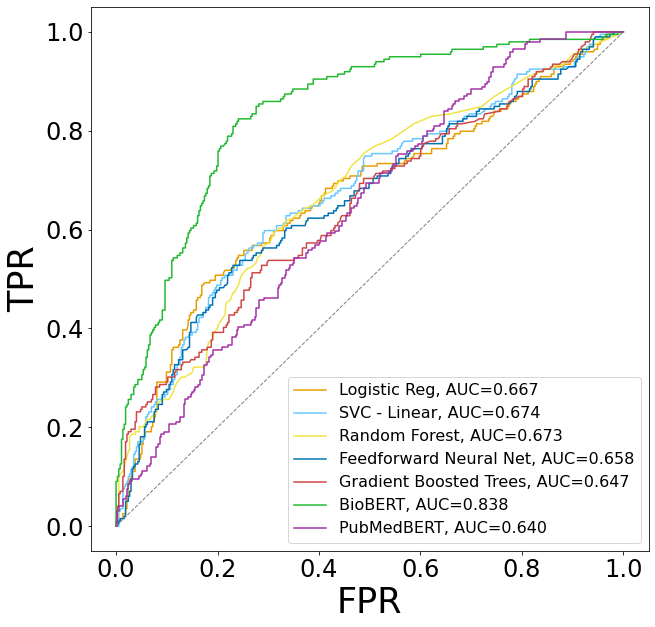

Here are the fs
[0.5368421052631579, 0.5436893203883495, 0.43401759530791784, 0.5147453083109919, 0.44827586206896547, 0.0, 0.0]
Here are the recs
[0.5125628140703518, 0.5628140703517588, 0.37185929648241206, 0.4824120603015075, 0.39195979899497485, 0.0, 0.0]


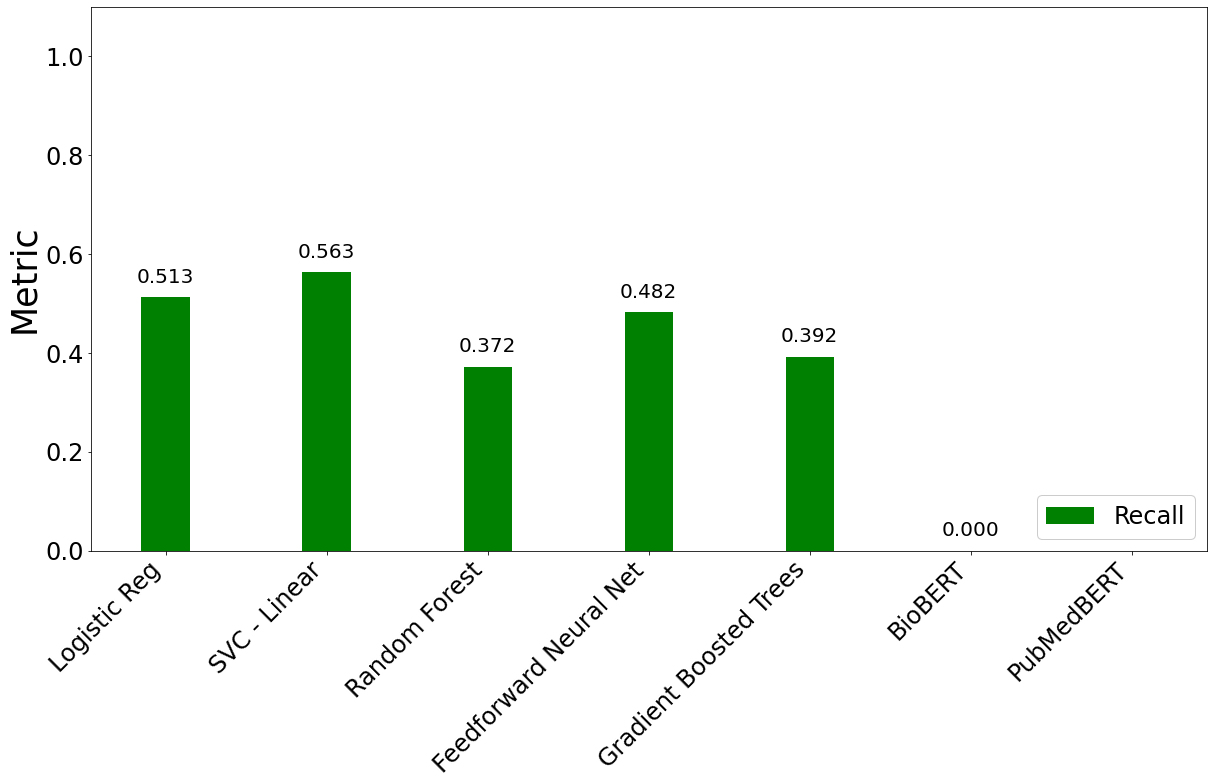

Looking at benchmark: any_rel_con_section_match
Accuracy 0.48426573426573427
Looking at benchmark: is_con_mention_max
Accuracy 0.6713286713286714
Looking at benchmark: con_mention_50
Accuracy 0.701048951048951
Looking at benchmark: con_in_mesh_headings
Accuracy 0.6555944055944056
Looking at benchmark: min_sent_dist_1
Accuracy 0.6520979020979021
Looking at benchmark: min_sent_dist_2
Accuracy 0.6520979020979021
Looking at benchmark: min_sent_dist_3
Accuracy 0.6520979020979021
Looking at benchmark: min_sent_dist_4
Accuracy 0.6573426573426573
Looking at benchmark: min_sent_dist_5
Accuracy 0.6416083916083916
Looking at benchmark: min_sent_dist_6
Accuracy 0.6381118881118881


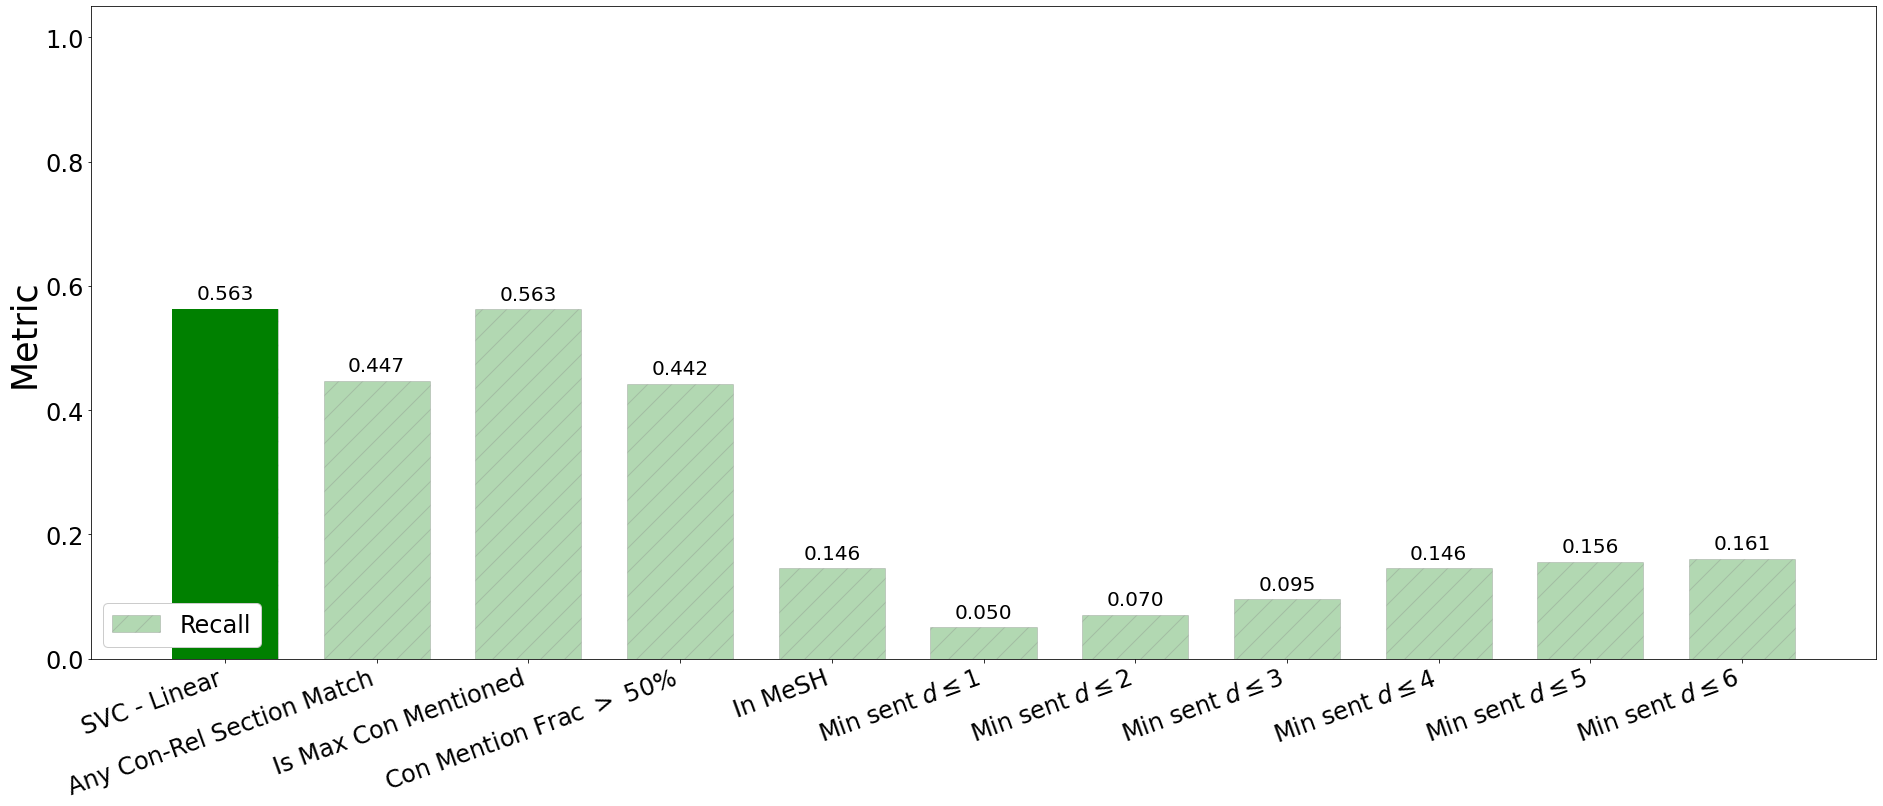

N negatives: 373
N positives: 199
Total len of resulting DF: 572


N negatives - after up/down-weighting: 199
N positives - after up/down-weighting: 199
Total len of resulting DF: 398
norm_rel_sec_title not found in column list. Assigning it a column of falses
norm_rel_sec_abstract not found in column list. Assigning it a column of falses
norm_rel_sec_methods not found in column list. Assigning it a column of falses
Initializing list of untrained models...
Fitting model: Logistic Reg
Fitting model: SVC - Linear
Fitting model: Random Forest
Fitting model: Feedforward Neural Net
Fitting model: Gradient Boosted Trees


Map:   0%|                                                                                       | 0/265 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Pre-saved model already found, loading from /Users/dnsosa/Desktop/AltmanLab/lit_contextizer/TFmodels/biobert/giantRetrain50NC_TRAINED


Map:   0%|                                                                                       | 0/265 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Pre-saved model already found, loading from /Users/dnsosa/Desktop/AltmanLab/lit_contextizer/TFmodels/pubmedbert/giantRetrain50NC_TRAINED


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Looking at clf: Logistic Reg
Accuracy 0.5714285714285714
PRINTING METRICS!
(0.68, 0.4533333333333333, 0.544, None)
Looking at clf: SVC - Linear
Accuracy 0.5639097744360902
PRINTING METRICS!
(0.6888888888888889, 0.41333333333333333, 0.5166666666666667, None)
Looking at clf: Random Forest
Accuracy 0.556390977443609
PRINTING METRICS!
(0.6739130434782609, 0.41333333333333333, 0.512396694214876, None)
Looking at clf: Feedforward Neural Net
Accuracy 0.5639097744360902
PRINTING METRICS!
(0.673469387755102, 0.44, 0.532258064516129, None)
Looking at clf: Gradient Boosted Trees
Accuracy 0.6015037593984962
PRINTING METRICS!
(0.72, 0.48, 0.576, None)


/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dnsosa/opt/miniconda3/envs/lit_con4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Accuracy 0.5263157894736842
PRINTING METRICS!
(0.0, 0.0, 0.0, None)


Accuracy 0.5413533834586466
PRINTING METRICS!
(0.6666666666666666, 0.06349206349206349, 0.11594202898550725, None)


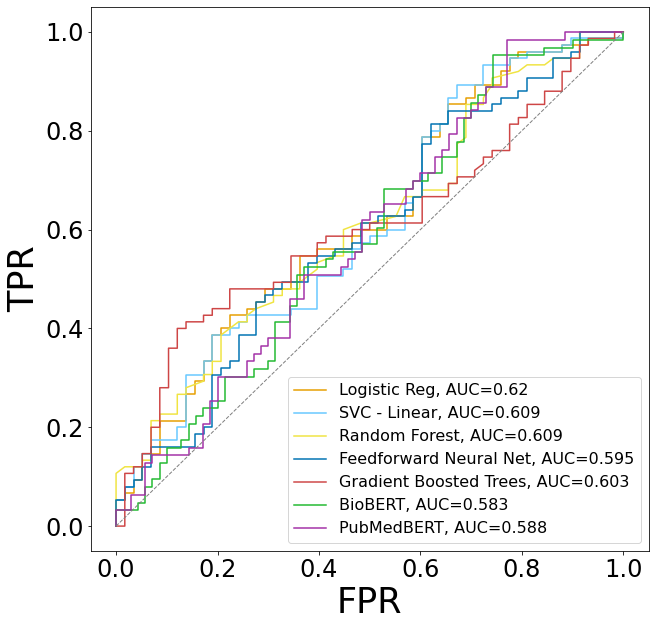

Here are the fs
[0.544, 0.5166666666666667, 0.512396694214876, 0.532258064516129, 0.576, 0.0, 0.11594202898550725]
Here are the recs
[0.4533333333333333, 0.41333333333333333, 0.41333333333333333, 0.44, 0.48, 0.0, 0.06349206349206349]
Enumerating fs


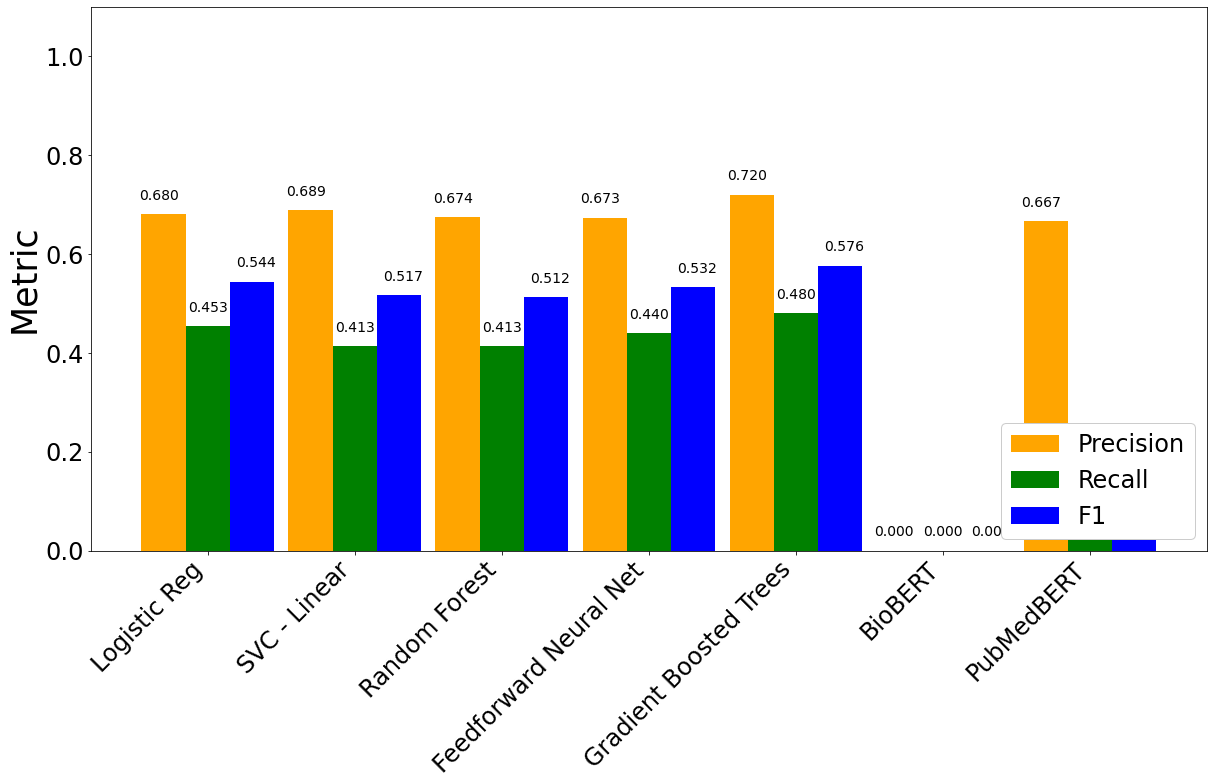

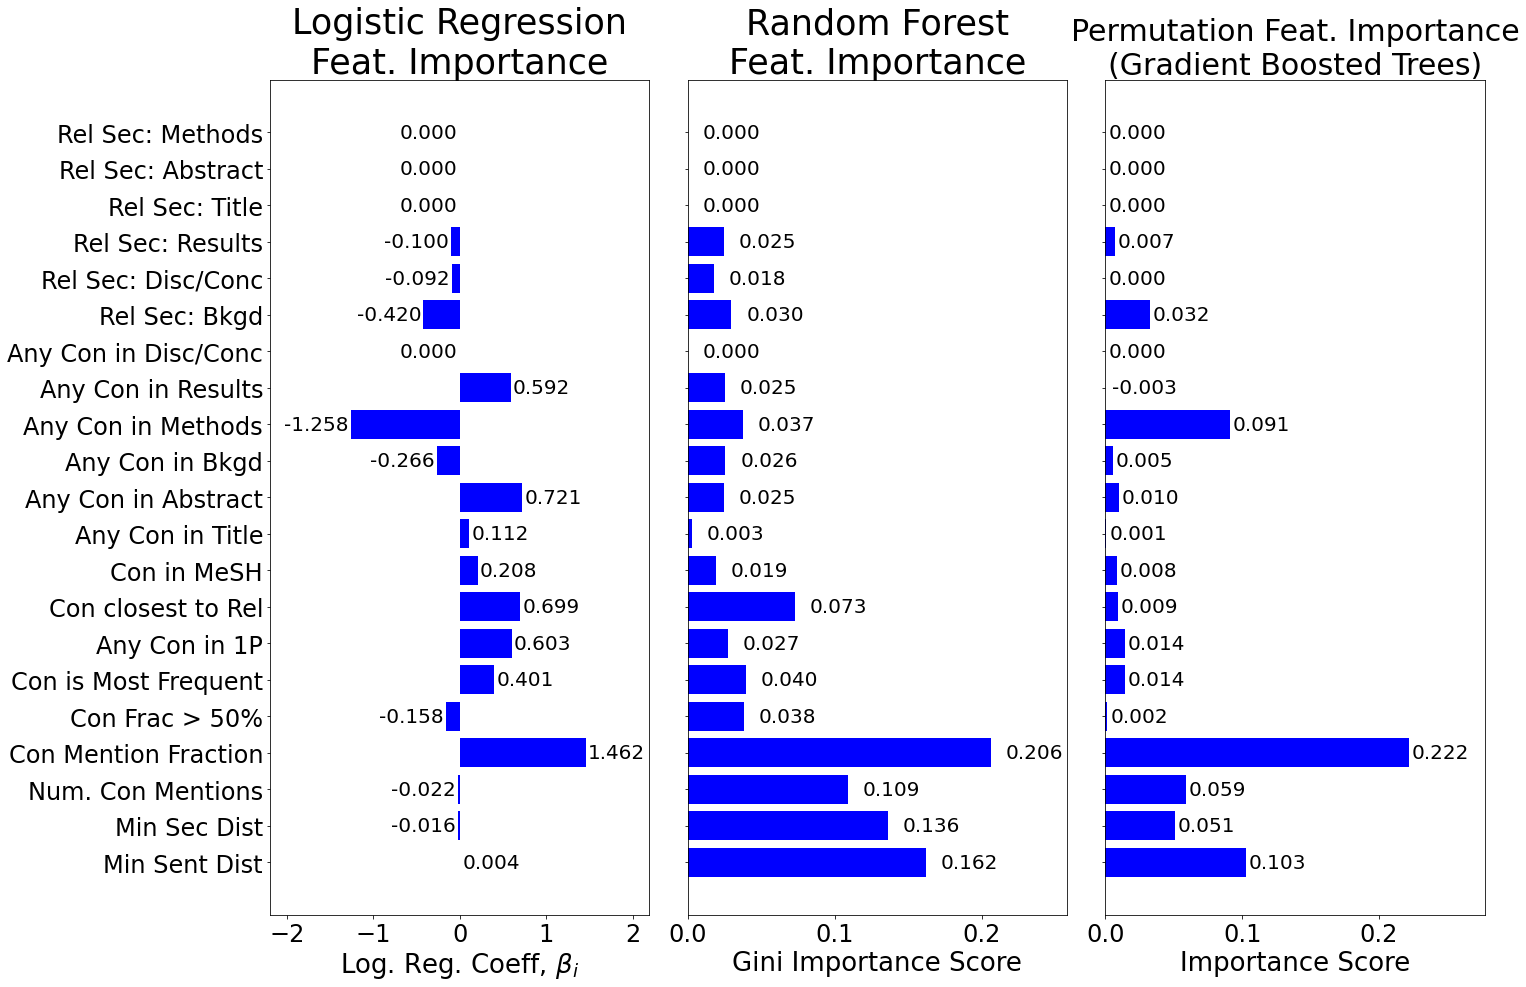

Looking at benchmark: any_rel_con_section_match
Accuracy 0.4623115577889447
Looking at benchmark: is_con_mention_max
Accuracy 0.6532663316582915
Looking at benchmark: con_mention_50
Accuracy 0.6482412060301508
Looking at benchmark: con_in_mesh_headings
Accuracy 0.5376884422110553
Looking at benchmark: min_sent_dist_1
Accuracy 0.507537688442211
Looking at benchmark: min_sent_dist_2
Accuracy 0.5100502512562815
Looking at benchmark: min_sent_dist_3
Accuracy 0.5175879396984925
Looking at benchmark: min_sent_dist_4
Accuracy 0.5301507537688442
Looking at benchmark: min_sent_dist_5
Accuracy 0.5150753768844221
Looking at benchmark: min_sent_dist_6
Accuracy 0.5125628140703518


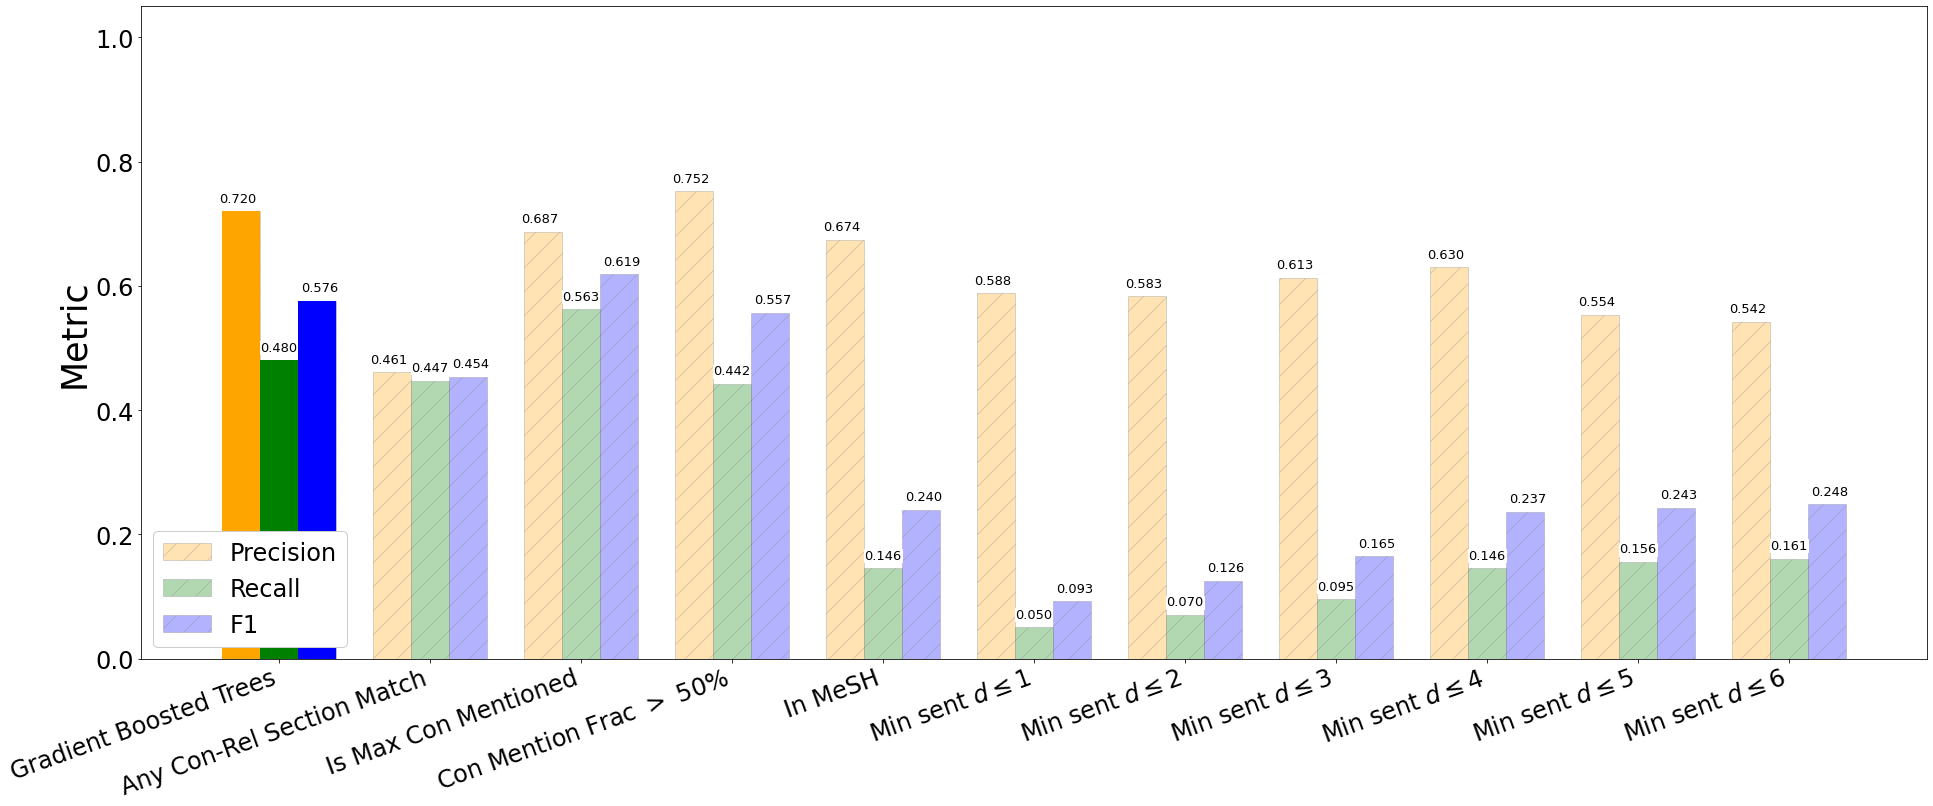

In [12]:
giant_res_df50NC_transfer, _, _ = generate_analysis_figs(giant_df_features_annots50NC,  
                                                         data_id="giantTransfer50NC",
                                                         tf_model_root_dir=tf_model_root_dir,
                                                         grouped_analysis=True,
                                                         downsample_maj=False,
                                                         upsample_min=False,
                                                         weight_imbalance=False,
                                                         in_clf_list=insider_CT_clf_list,
                                                         plot_roc_curve=True,
                                                         plot_confusion_matrices=False,
                                                         plot_feature_analysis=False,
                                                         recall_only=True,
                                                         out_dir=fig_out_dir,
                                                         filename="giantTransfer50NC")


plot_benchmark_fig(giant_res_df50NC_transfer, 
                  best_model_name="SVC - Linear", 
                  best_model_stats=[.563],
                  recall_only=True,
                  out_dir=fig_out_dir,
                  filename="giantTransfer50NC")

giant_res_df50NC_retrain, _, _ = generate_analysis_figs(giant_df_features_annots50NC, 
                                                        data_id="giantRetrain50NC",
                                                        tf_model_root_dir=tf_model_root_dir, 
                                                        grouped_analysis=True,
                                                        downsample_maj=True,
                                                        upsample_min=False,
                                                        weight_imbalance=False,
                                                        plot_roc_curve=True,
                                                        plot_confusion_matrices=False,
                                                        plot_feature_analysis=True,
                                                        recall_only=False,
                                                        out_dir=fig_out_dir,
                                                        filename="giantRetrain50NC")

plot_benchmark_fig(giant_res_df50NC_retrain, 
                   best_model_name="Gradient Boosted Trees", 
                   best_model_stats=[.720, .480, .576],
                   out_dir=fig_out_dir,
                   filename="giantRetrain50NC")

### Deconvolving Cell Type Contexts for Dengue Fever Etiology 

Finally, let's take a look at applying our pipeline to an example slice of literature--PPIs relevant in host response to Dengue infection. Specifically let's see which cell types these interactions we find in literature come from.

Dengue_pps_df network has: 89971 directed edges
There are: 5853 unique genes in this network
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-5853...done.
Finished.
1 input query terms found dup hits:
	[('FCGR2C', 2)]
22 input query terms found no hit:
	['UHRF1BP1L', 'MT-ND3', 'DDX58', 'MT-ND5', 'MT-ND2', 'MYLPF', 'ARNTL', 'MT-CO3', 'TTC37', 'MT-CO2', 
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
Retrieved a mapping from Entrez to gene symbols
Input: 88774 dengue-related PPIs
After taking subset of relations, need to extract features from: 8787 papers
From this list found 11674 dengue relations
N negatives: 12470
N positives: 0
Total len of resulting DF: 12470


N negatives - after up/down-weighting: 12470
N positives - after up/down-weighting: 0
Total len of resulting DF: 12470
List of 5 pre-trained models provided. No need to initialize new models.
L

/Users/dnsosa/opt/miniconda3/envs/lit_con2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dnsosa/opt/miniconda3/envs/lit_con2/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/dnsosa/opt/miniconda3/envs/lit_con2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dnsosa/opt/miniconda3/envs/lit_con2/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1016: UndefinedMetricWarning

Accuracy 0.6914995990376904
Looking at clf: Feedforward Neural Net
Accuracy 0.6170809943865276
Looking at clf: Gradient Boosted Trees
Accuracy 0.7268644747393745


/Users/dnsosa/opt/miniconda3/envs/lit_con2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dnsosa/opt/miniconda3/envs/lit_con2/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/dnsosa/opt/miniconda3/envs/lit_con2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dnsosa/opt/miniconda3/envs/lit_con2/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1016: UndefinedMetricWarning

<Figure size 720x720 with 0 Axes>

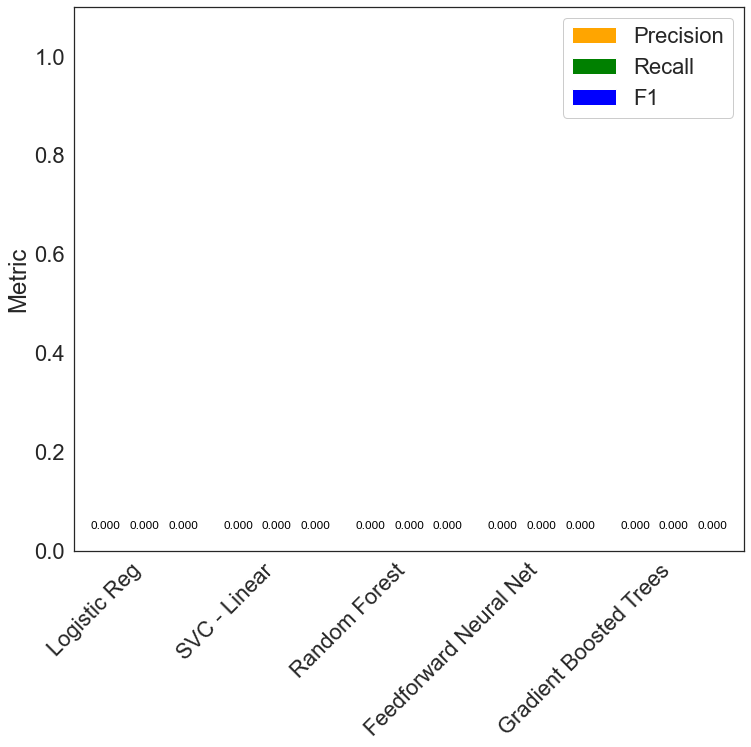

In [53]:
# Load up the corpus of PPIs and the relations we've found with our dependency parse method that contain these two gene/proteins.
dengue_ppis_df = create_dengue_corpus()
print(f"Input: {len(dengue_ppis_df)} dengue-related PPIs")
dengue_relations_df = dl.get_relation_subset_from_ppi_intersect(subset_df=dengue_ppis_df)
print(f"From this list found {len(dengue_relations_df)} dengue relations")

dengue_features_df_path = os.path.join(out_dir, "dengue_papers_features_df.tsv")
dengue_features_df = pd.read_csv(dengue_features_df_path, sep='\t')
dengue_features_df['annotation'] = False  # Placeholder

# Transferring the model from the CT-Insider corpus here
_, _, dengue_predictions_df = generate_analysis_figs(dengue_features_df, 
                                                     grouped_analysis=True,
                                                     downsample_maj=False,
                                                     upsample_min=False,
                                                     weight_imbalance=False,
                                                     in_clf_list=insider_CT_clf_list,
                                                     plot_roc_curve=True,
                                                     plot_confusion_matrices=False,
                                                     plot_feature_analysis=False,
                                                     in_loc="upper right")


In [59]:
# Taking a closer look at the predicted associations

dengue_relations_df_small = dengue_relations_df[["rel", "entity1_text", "entity2_text", "entity1_entrez", "entity2_entrez"]]

col_list = ["rel", "entity1_text", "entity2_text", "entity1_entrez", "entity2_entrez", "con", "Pred: Random Forest"]
dengue_conned_rels_df = dengue_predictions_df.merge(dengue_relations_df_small, on="rel", how="inner")[col_list]

dengue_edgelist = dengue_conned_rels_df[dengue_conned_rels_df["Pred: Random Forest"]]
print(f"The random forest transferred from the Insider CT training yielded: {len(dengue_edgelist)} context associations")
for in_con in ["macrophage", "hepatocyte", "neutrophil"]:
    print(f"...{len(dengue_edgelist[dengue_edgelist.con == in_con])} from {in_con}")
    
dengue_edgelist.head(5)


The random forest transferred from the Insider CT training yielded: 4400 context associations
...1577 from macrophage
...466 from hepatocyte
...270 from neutrophil


,rel,entity1_text,entity2_text,entity1_entrez,entity2_entrez,con,Pred: Random Forest
0,"Treatment with anti-IL5 antibody, that reduced the number of submucosal eosinophils in patients with asthma, was associated with a reduction in TGF-β levels in bronchoalveolar lavage fluid 34 , indicating that TGF-β may be induced by IL-5.",TGF-β,IL-5,27035,50507,neutrophil,True
3,"These results indicate that IL-18 enhances YY1 expression via NF-κB, leading to the repression of FXR expression by elevated YY1, resulting in reduced of MRP2 expression.",IL-18,YY1,183,2597,hepatocyte,True
7,"In order to detect whether type I IFN (IFN-α/β) can induce ATX expression directly, the THP-1 cells were treated with IFN-α and IFN-β respectively.",IFN,ATX,3553,3606,macrophage,True
9,"ATX expression was induced quickly by IFN-α, peaked at 2h of treatment and then decreased, while during IFN-β treatment ATX expression was increased continually, achieved high levels after 8h treatment and then kept at the high levels.",ATX,IFN-α,728,3605,macrophage,True
11,A PPAR γ antagonist increased eNOS expression in adipocytes and suppressed HFD-induced fatty liver changes.,PPAR γ,eNOS,930,4907,hepatocyte,True


Do we find relations that are uniquely mapped to just one of the three contexts, or are they often predicted to be associated with all 3 contexts at the same time, for example?

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


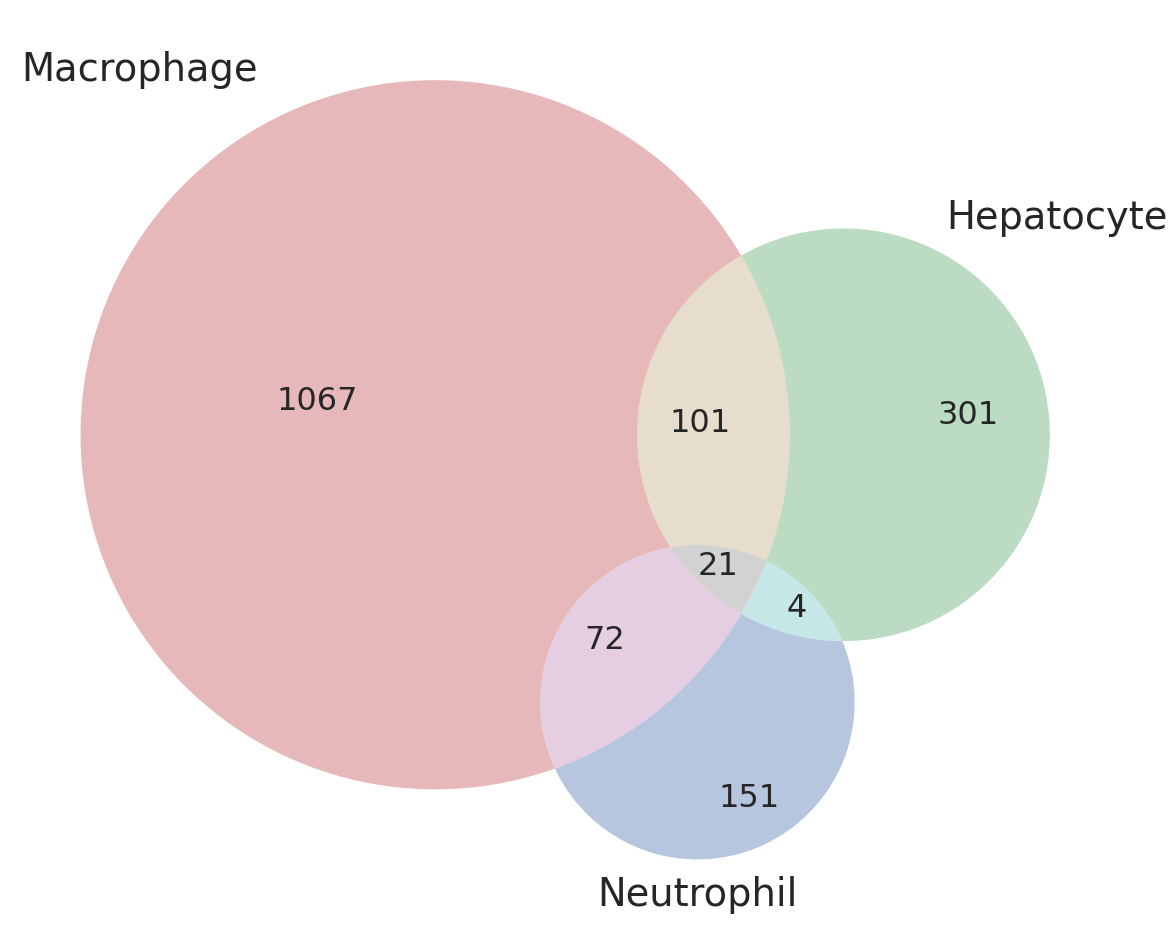

In [57]:
plot_mac_hep_neu_venn(dengue_edgelist, fig_out_dir, dpi=300)

And at last we can visualize a subnetwork where we highlight pieces that have a particular cell type association, which will help us disentangle which parts of the mechanism are involved with which cells!

In [67]:
import os

import itertools
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from matplotlib_venn import venn3
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from sklearn.metrics import ConfusionMatrixDisplay

def plot_dengue_networks(dengue_edgelist, fig_out_dir, min_deg=5, max_deg=15, dpi=300):
    plt.rcParams["figure.figsize"] = (20, 20)

    G_dengue = nx.from_pandas_edgelist(dengue_edgelist, 'entity1_text', 'entity2_text', ['con'])
    mid_degree_nodes = [n for n, d in G_dengue.degree if min_deg <= d <= max_deg]

    G_dengue_sub = G_dengue.subgraph(list(mid_degree_nodes))
    Gcc = G_dengue_sub.subgraph(max(nx.connected_components(G_dengue_sub), key=len)).copy()
    Gcc.remove_edges_from(nx.selfloop_edges(Gcc))

    pos = nx.spring_layout(Gcc, seed=44)

    min_ct_count = 200
    color_palette = ["#D81B60", "#1E88E5", "#FFC107", "#004D40", "#90AB78", "#7B93B9"]
    common_cts = [CT for CT, count in Counter(dengue_edgelist.con).most_common() if count >= min_ct_count]
    ct_color_mapper = dict(zip(common_cts, color_palette))

    nx.draw_networkx_nodes(Gcc, pos, node_size=60, node_color='gray', alpha=1)
    nx.draw_networkx_edges(Gcc, pos, alpha=0.5)
    plt.axis('off')

    out_file = os.path.join(fig_out_dir, "DengueAllCTsSubnet.png")
    plt.savefig(out_file, dpi=dpi, bbox_inches="tight")
    plt.show()

    for ct in ['macrophage', 'hepatocyte', 'neutrophil']:
        nx.draw_networkx_nodes(Gcc, pos, node_size=60, node_color='gray', alpha=0.25)

        edge_colors = []
        edge_widths = []

        for e in Gcc.edges(data=True):
            e_con = e[2]['con']
            if e_con == ct:
                edge_colors.append(ct_color_mapper.get(e_con, 'gray'))
                edge_widths.append(5)
            else:
                edge_colors.append('gray')
                edge_widths.append(1)
        nx.draw_networkx_edges(Gcc, pos, alpha=0.5, edge_color=edge_colors, width=edge_widths, label=ct)

        ct_edge_set = set([(e[0], e[1]) for e in Gcc.edges(data=True) if e[2]['con'] == ct])
        ct_node_set = set(itertools.chain(*ct_edge_set))

        labels = {k: k for k in ct_node_set}
        nx.draw_networkx_labels(Gcc, pos, labels, font_size=25)

        plt.axis('off')

        out_file = os.path.join(fig_out_dir, f"Dengue_{ct}_subnet.png")
        plt.savefig(out_file, dpi=dpi, bbox_inches="tight")
        plt.show()


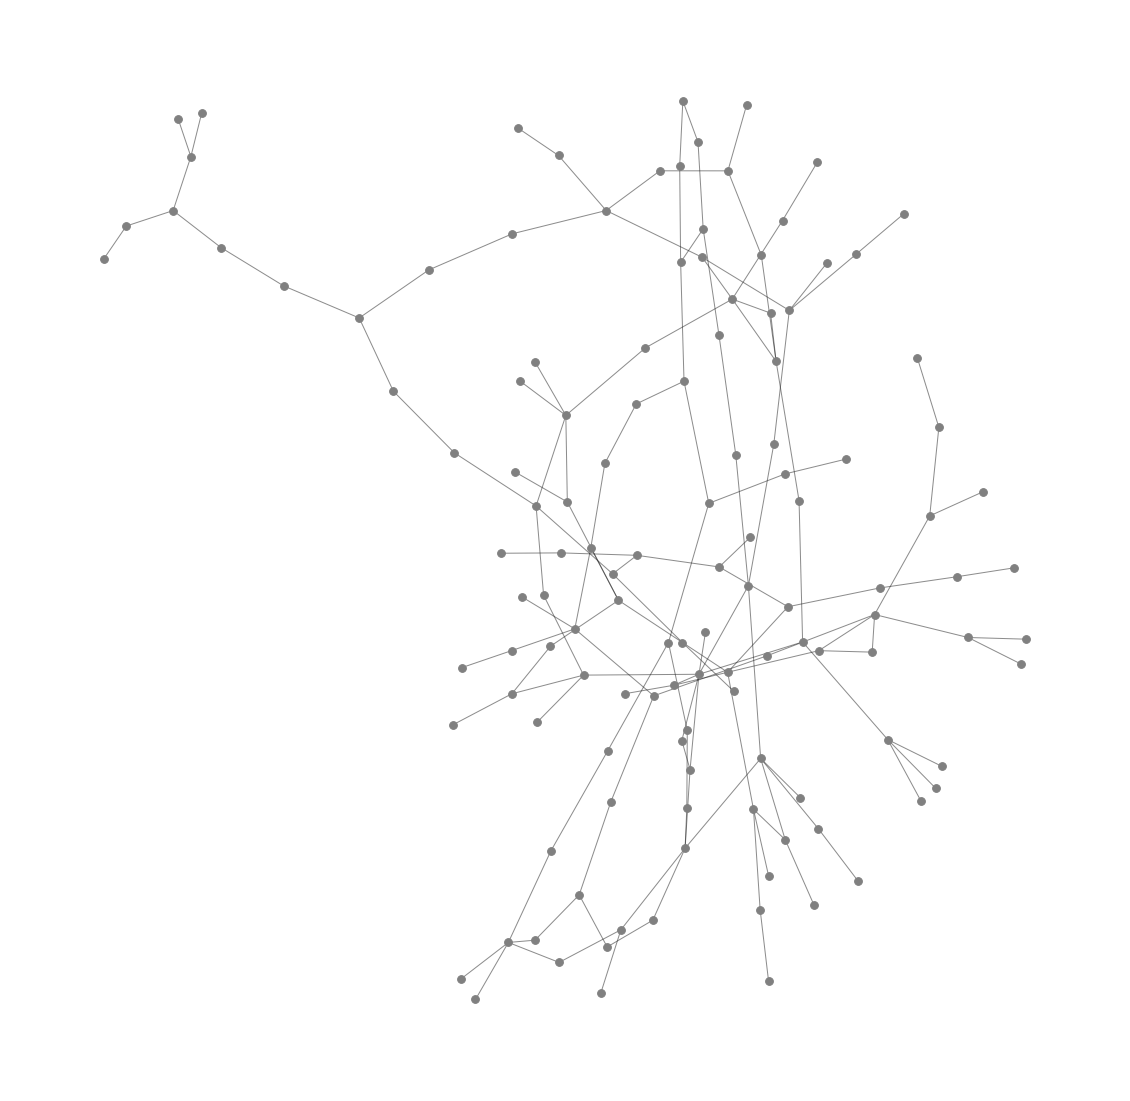

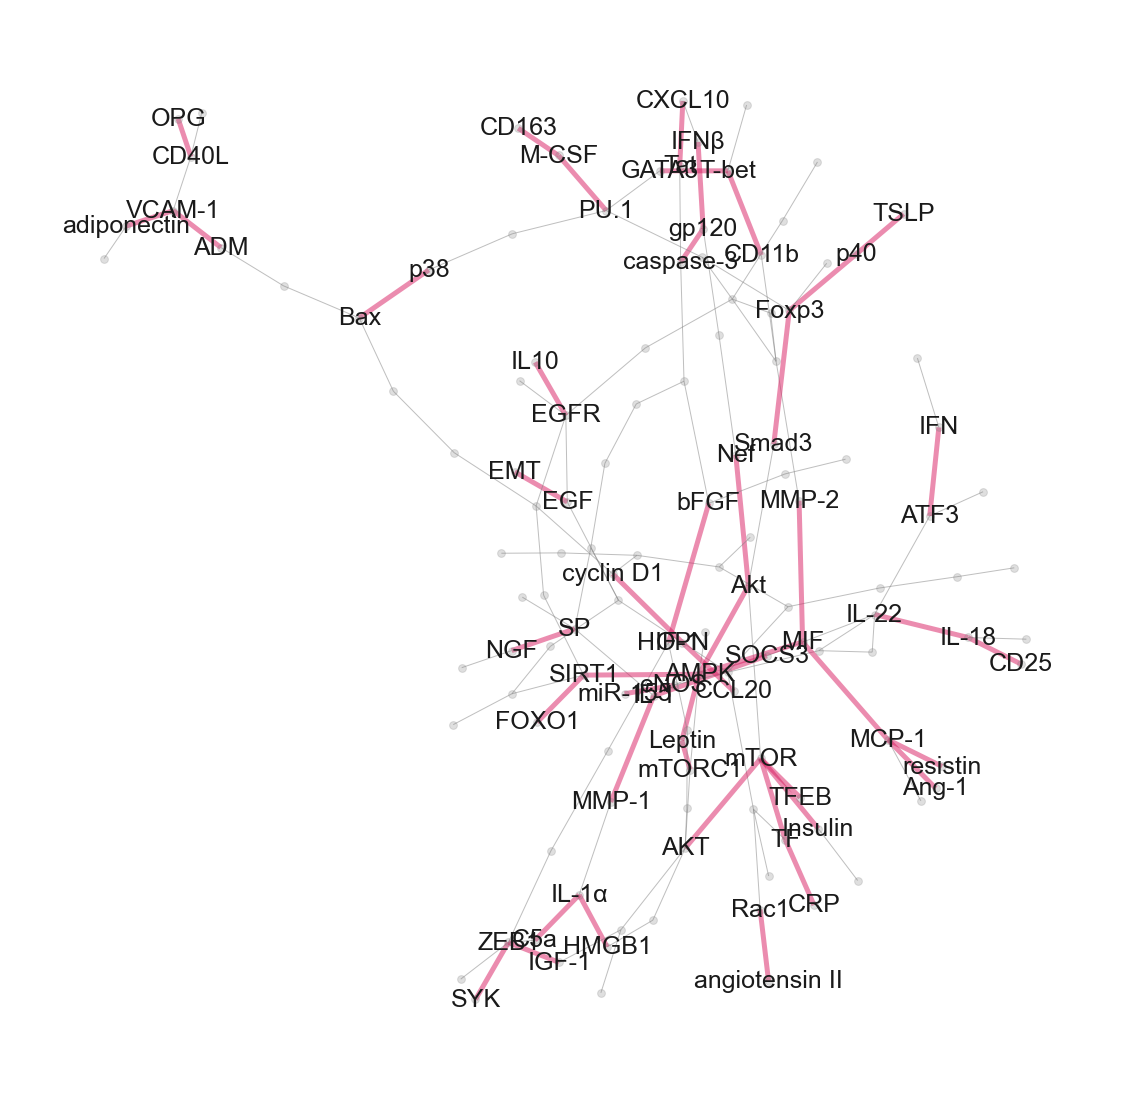

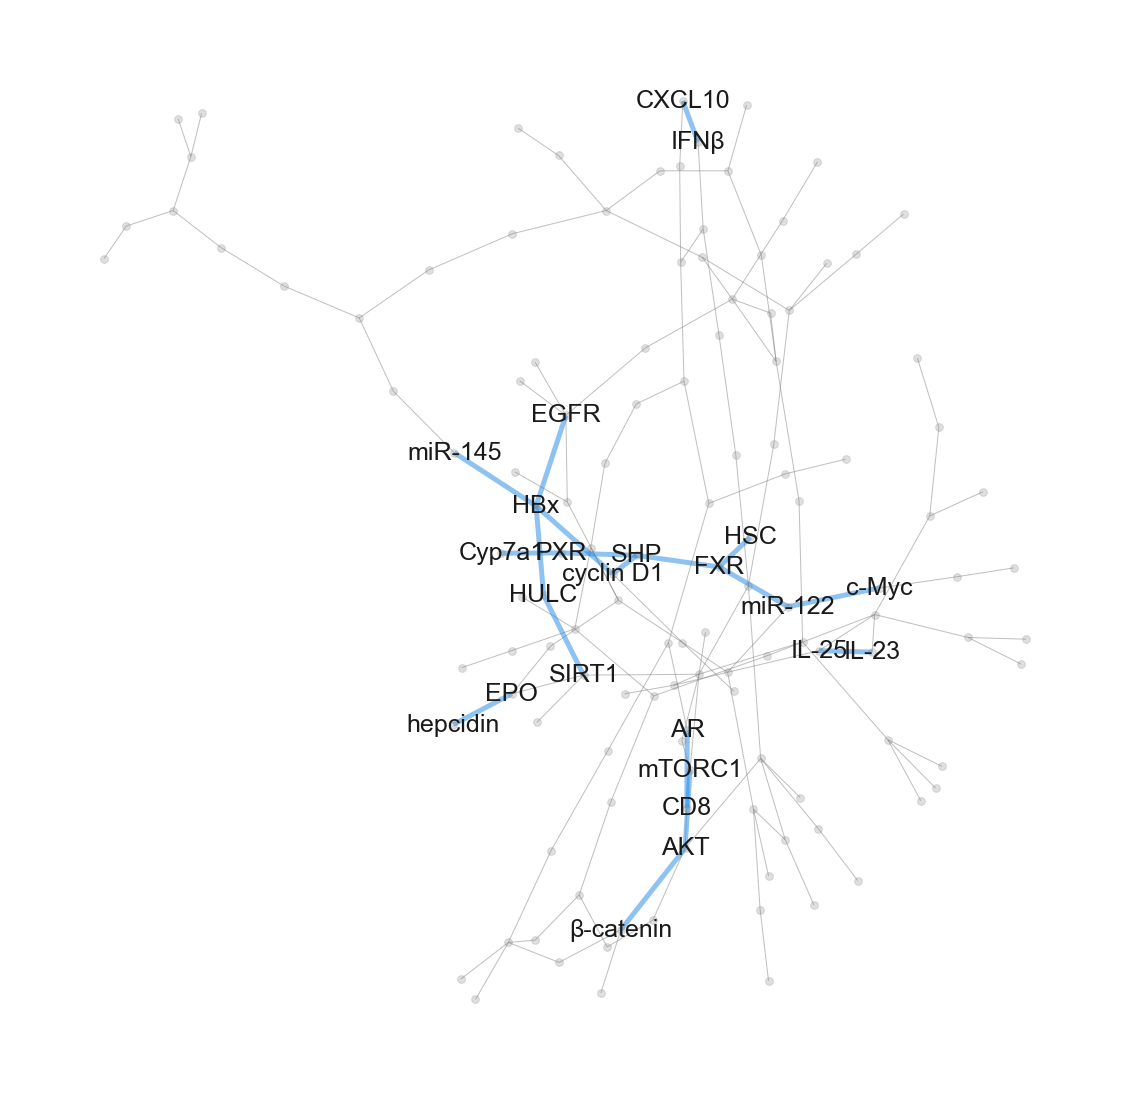

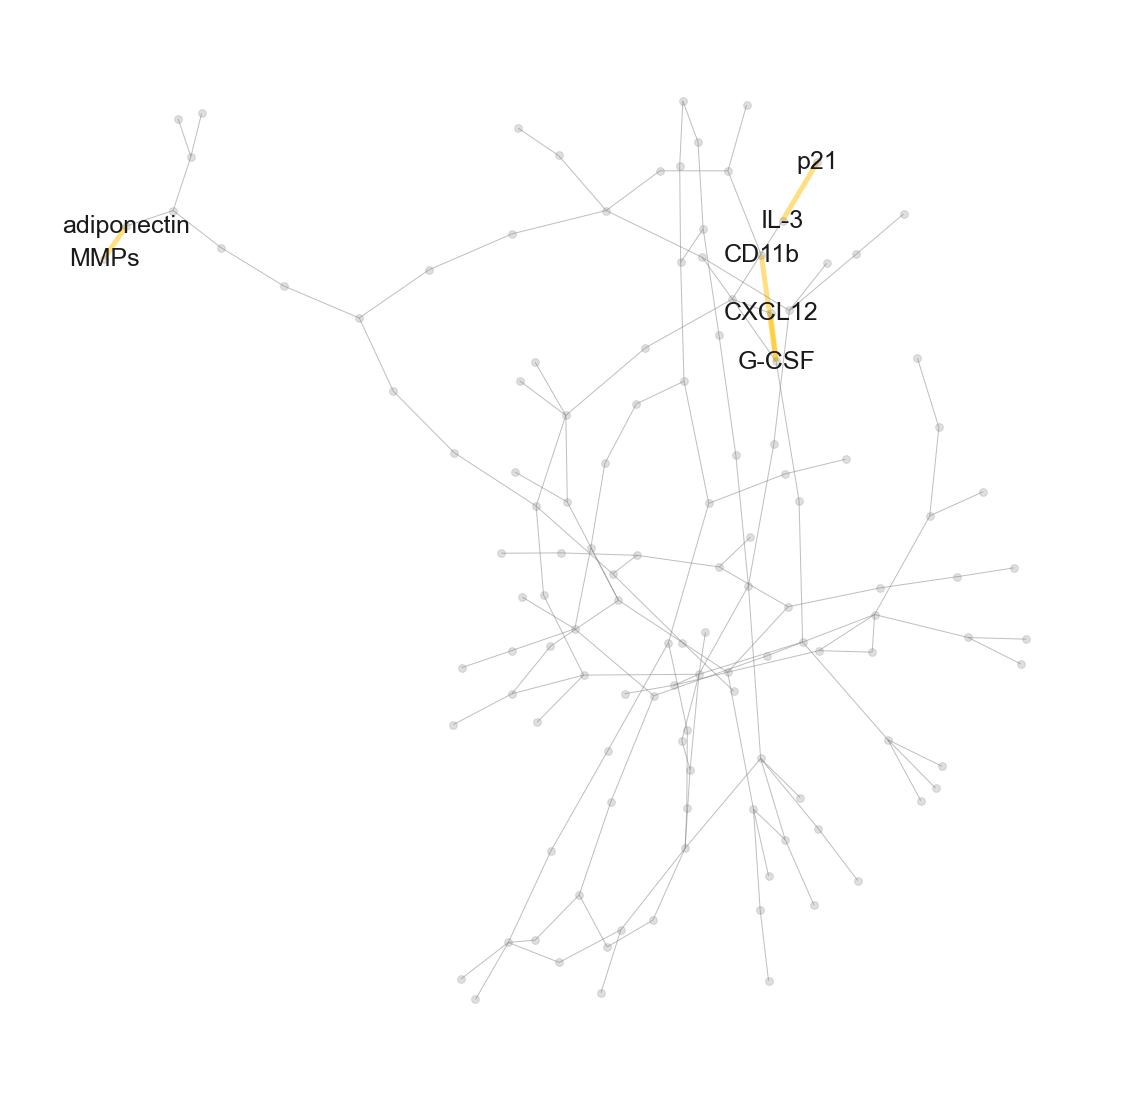

In [68]:
plot_dengue_networks(dengue_edgelist, fig_out_dir)